# 데이터 전처리
- 패키지를 사용한 데이터 전처리 방법
    - mossingno 패키지 : 결측 데이터 검색
    - sklearn.impute 패키지 : 결측 데이터 대체
    - patsh 패키지 : 데이터 선택, 변환, 추가, 스케일링
    - sklearn.preproscessing 패키지 : 스케일링, 변환

## missingno package
- 데이터 수집 시 데이터의 일부가 누락되어 결측(missing) 데이터가 생길 수 있다.
- missingno 패키지는 pandas 데이터 프레임에서 결측 데이터를 찾는 기능을 제공한다.
    - 데이터 프레임의 결측 데이터가 NaN(not a number) 값으로 저장되어야 한다.
- NaN 값은 부동소수점 실수 자료형에서만 발생하는 값이다.
    - 정수 자료형 넣을 때 : Int64Dtype 자료형 명시
    - 시간 자료형 넣을 때 : parse_dates 인수로 파싱 
    - 해주어야 결측 데이터가 NaN으로 표시된다.
- pandas 데이터 프레임에도 결측 데이터의 위치를 확인해주는 기능이 있다.
    - isnull()
    - isna()
- missingno 패키지는 대규모 데이터에서도 결측 데이터에 대한 시각화를 쉽게 할 수있다.
    - matrix() 함수 : 결측 데이터를 시각화하는 기능
    - 결측데이터 흰색, 그렇지 않은 데이터는 검은색으로 나타남.
    - 오른쪽에 각 행의 완성도를 나타내는 스파크라인이 함께 나타난다.

In [1]:
from io import StringIO

### pandas를 사용한 결측치 확인

- 쉼표 사이에 공백이 있으면 공백으로 처리된다.
- NaN 표시가 안된다.
- parse_dates=[column number] : 시계열 컬럼을 넣으면 Dtype이 "datetime64[ns]"가 된다. 시계열 컬럼이 아니면 Dtype이 바뀌지 않는다.

In [2]:
csv_data = StringIO("""
x1, x2, x3, x4, x5
1, 0.1, "1", 2019-01-01, A
2,,, 2022-06-13, B
3,, "3", 2022-06-01, C
, 0.4, "4", 2022-05-31, A
5, 0.5, "5", 2022-04-01, B
,,, 2021-02-14, C
7, 0.7, "7",, A
8, 0.8, "8", 2022-08-08, B
9, 0.9,, 2021-09-01, C
""")

df = pd.read_csv(csv_data, dtype={"x1" : pd.Int64Dtype()}, parse_dates=[3])
df

,x1,x2,x3,x4,x5
0,1,0.1,"""1""",2019-01-01,A
1,2,NaN,NaN,2022-06-13,B
2,3,NaN,"""3""",2022-06-01,C
3,<NA>,0.4,"""4""",2022-05-31,A
4,5,0.5,"""5""",2022-04-01,B
5,<NA>,NaN,NaN,2021-02-14,C
6,7,0.7,"""7""",NaT,A
7,8,0.8,"""8""",2022-08-08,B
8,9,0.9,NaN,2021-09-01,C


#### 판다스 데이터 프레임도 결측 데이터의 위치 확인 기능

In [3]:
df.isnull()

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False
7,False,False,False,False,False
8,False,False,True,False,False


In [4]:
df.isna()

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False
7,False,False,False,False,False
8,False,False,True,False,False


In [18]:
df.loc[df["x1"].isnull()]

,x1,x2,x3,x4,x5
3,<NA>,0.4,"""4""",2022-05-31,A
5,<NA>,NaN,NaN,2021-02-14,C


#### sum()으로 결측데이터의 갯수를 알 수 있다.
- 컬럼별 : axis=0 

In [19]:
df.isnull().sum()

x1     2
 x2    3
 x3    3
 x4    1
 x5    0
dtype: int64

In [20]:
df.isna().sum()

x1     2
 x2    3
 x3    3
 x4    1
 x5    0
dtype: int64

#### 행별로 결측데이터 갯수 확인
- axis=1

In [10]:
df.isnull().sum(axis=1)

0    0
1    2
2    1
3    1
4    0
5    3
6    1
7    0
8    1
dtype: int64

### missingno를 사용한 결측 데이터 확인

In [21]:
import missingno as msno

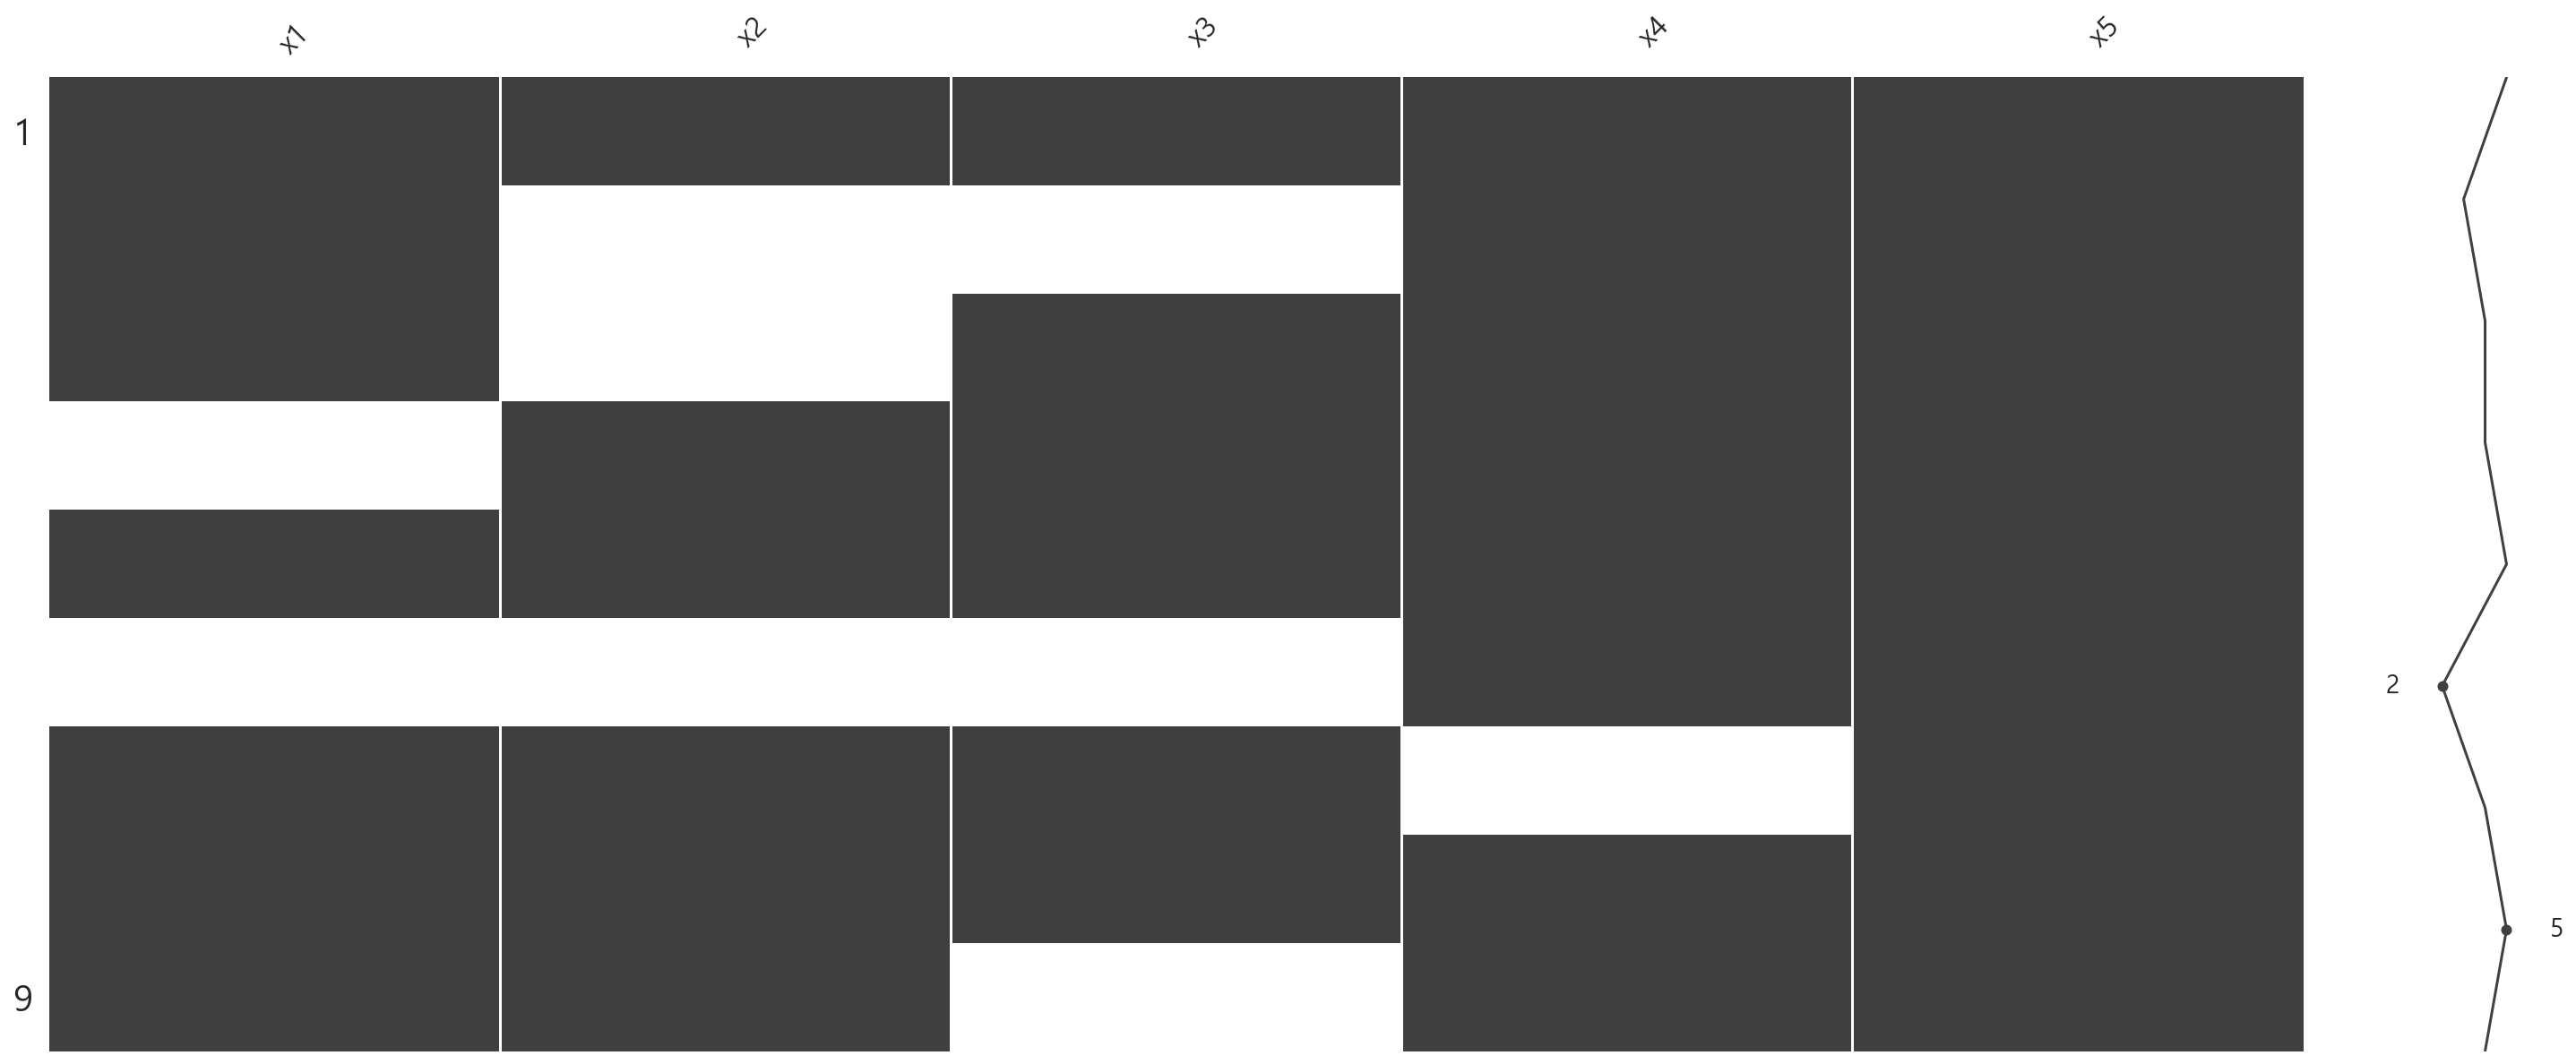

In [22]:
%matplotlib inline

msno.matrix(df)
plt.show() ;

#### 열별 결측데이터 확인

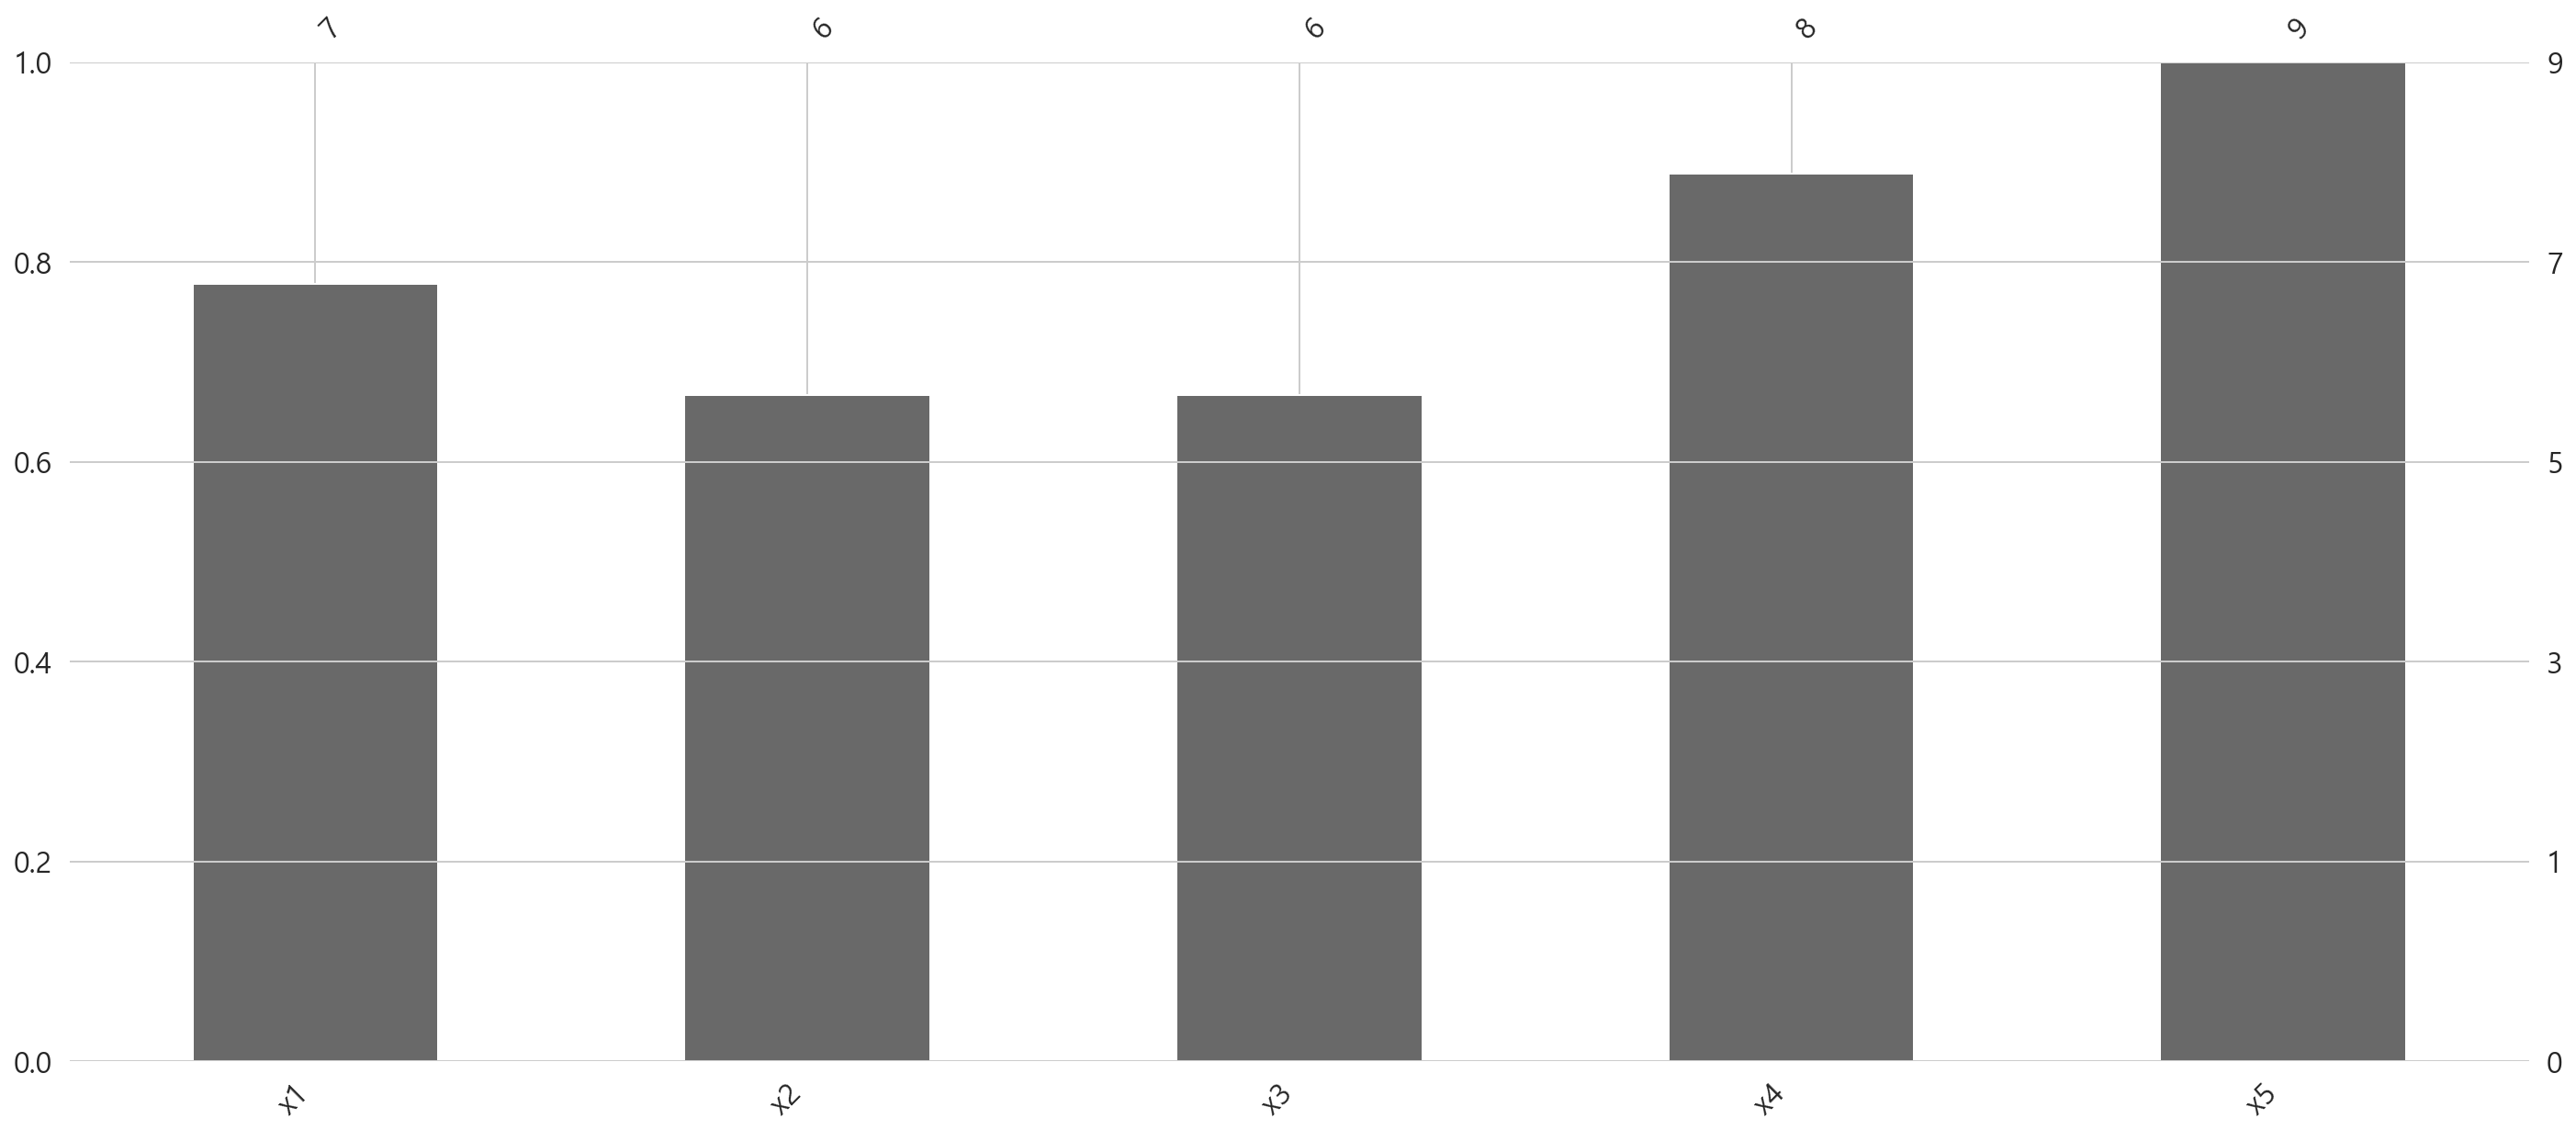

In [23]:
msno.bar(df)
plt.show() ; 

### 타이타닉 생존자 데이터 셋에서 결측 데이터 확인

In [81]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


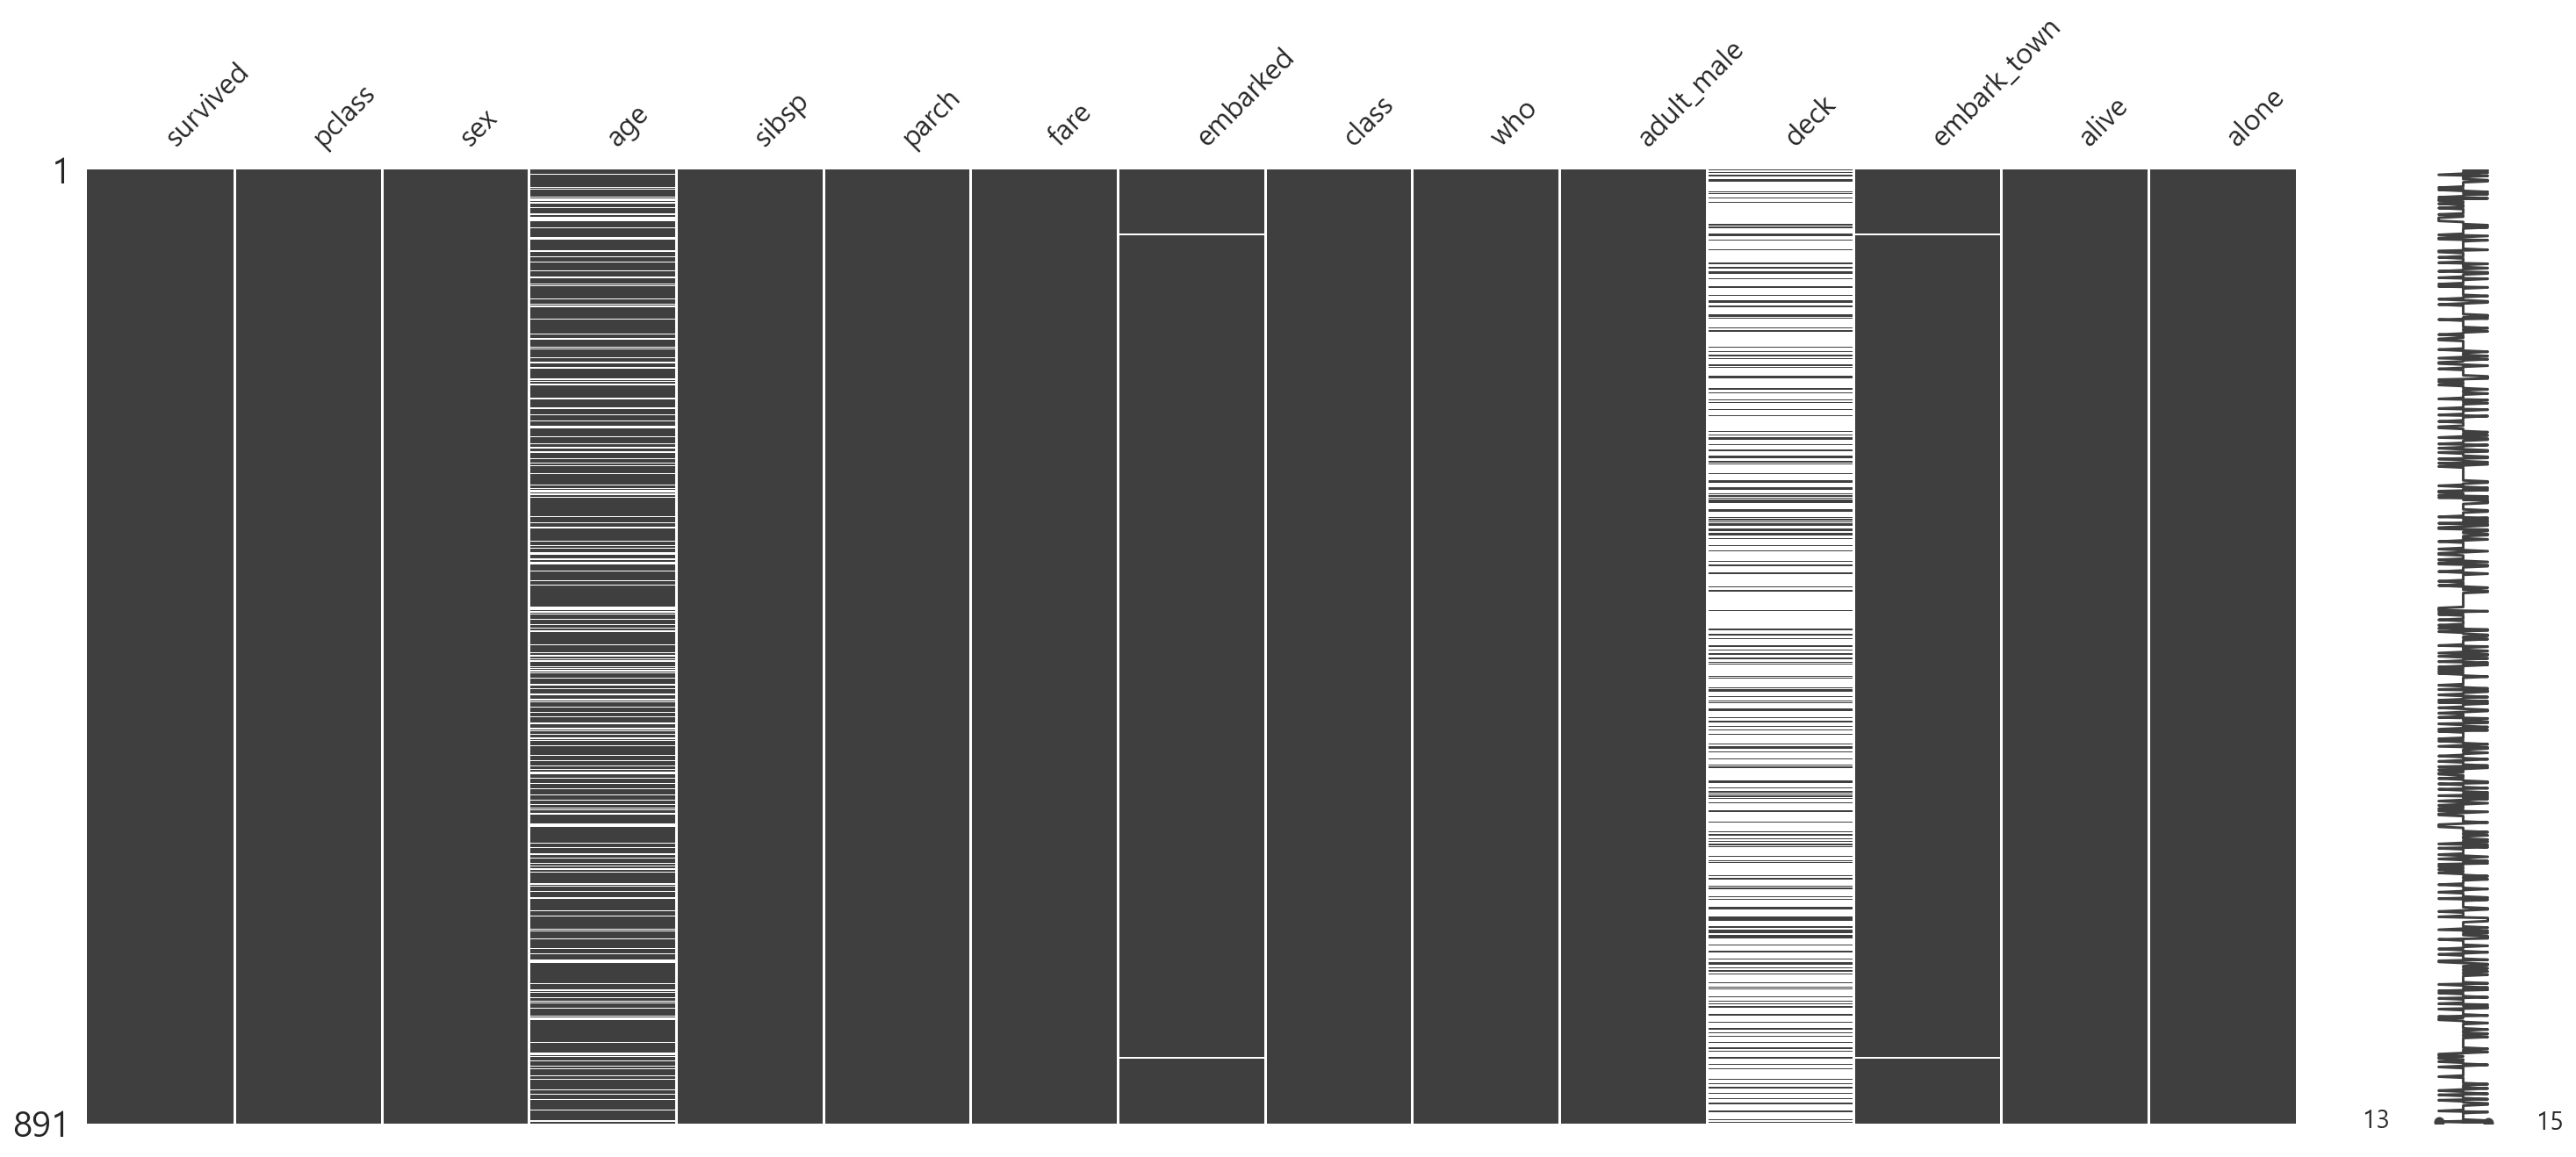

In [82]:
msno.matrix(titanic)
plt.show() ; 

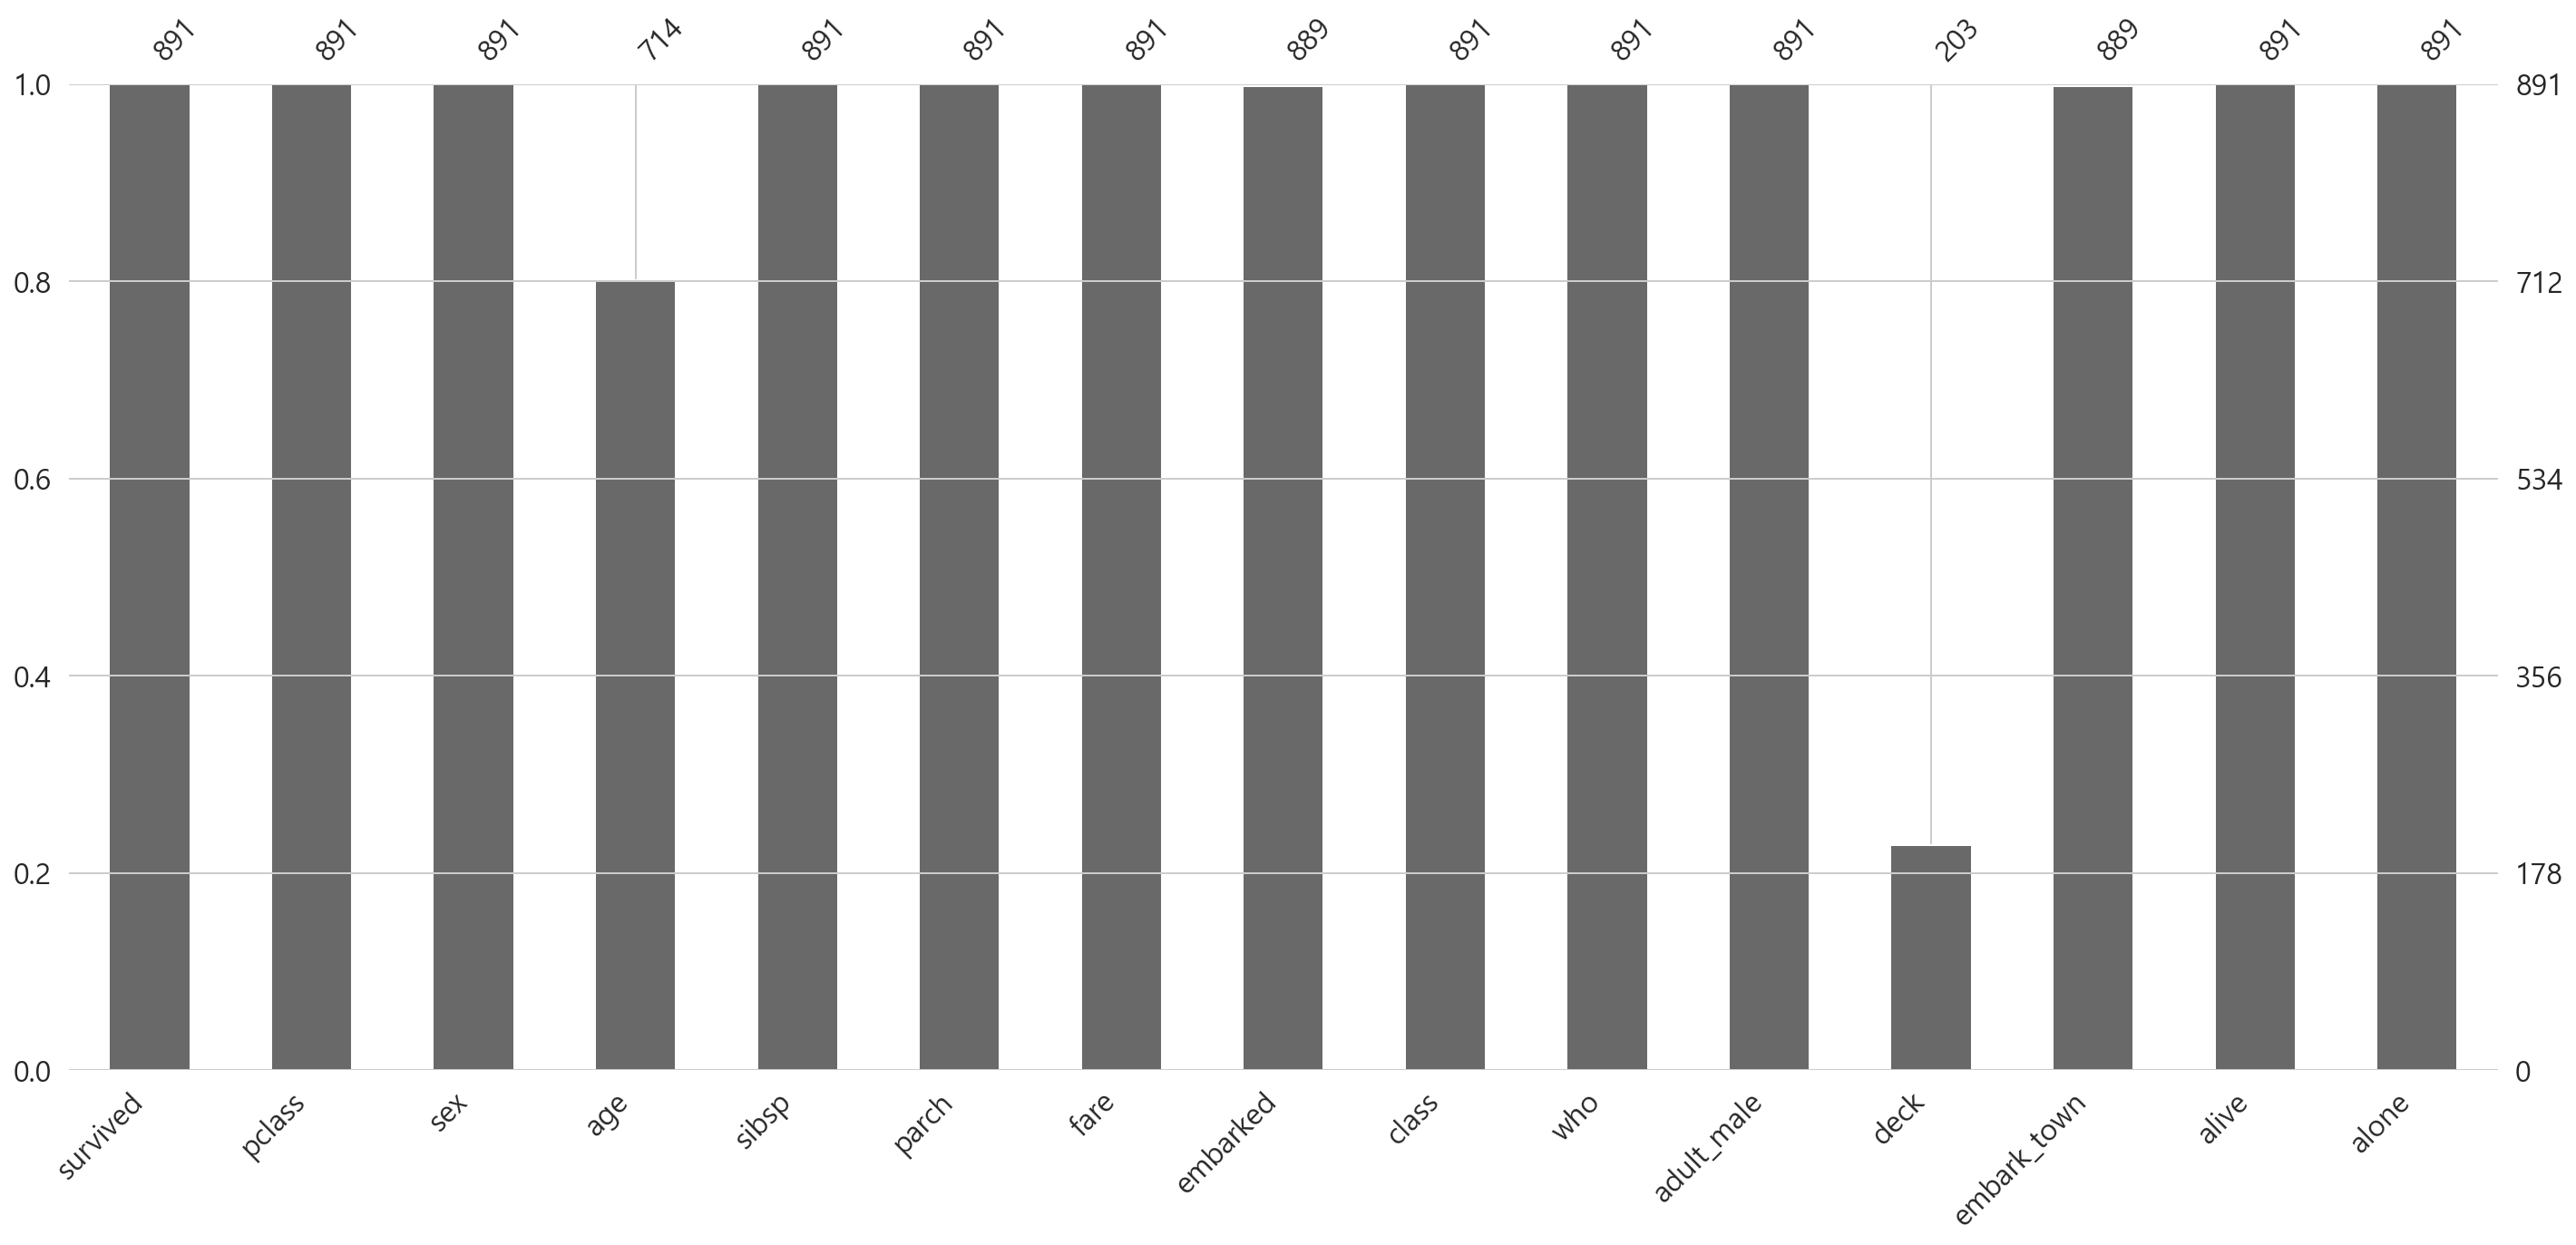

In [83]:
msno.bar(titanic)
plt.show() ; 

## 결측 데이터 처리 방법 2가지
- 결측 데이터가 너무 많은 경우 해당 데이터의 열 전체를 삭제
- 결측 데이터가 일부인 경우 그럴듯한 값으로 대체하는 방법 (imputation)

### 열 전체 삭제
- pandas의 dropna 매서드를 사용
- 결측 데이터 존재 행, 열 삭제
    - df.dropna(axis=0) : 각 행의 열별 비결측 데이터의 갯수를 세어준다. 행으로 반환된다.
    - df.dropna(axis=1) : 각 열의 행별 비결측 데이터의 갯수를 세어준다. 열로 반환된다.
- thresh 인수를 사용하여 특정 갯수 이상의 비결측 데이터가 있는 행, 열만 남겨준다.

In [27]:
df

,x1,x2,x3,x4,x5
0,1,0.1,"""1""",2019-01-01,A
1,2,NaN,NaN,2022-06-13,B
2,3,NaN,"""3""",2022-06-01,C
3,<NA>,0.4,"""4""",2022-05-31,A
4,5,0.5,"""5""",2022-04-01,B
5,<NA>,NaN,NaN,2021-02-14,C
6,7,0.7,"""7""",NaT,A
7,8,0.8,"""8""",2022-08-08,B
8,9,0.9,NaN,2021-09-01,C


#### 결측데이터가 하나라도 있는 열이면 삭제

In [28]:
df.dropna()

,x1,x2,x3,x4,x5
0,1,0.1,"""1""",2019-01-01,A
4,5,0.5,"""5""",2022-04-01,B
7,8,0.8,"""8""",2022-08-08,B


In [29]:
df.dropna(axis=1)

,x5
0,A
1,B
2,C
3,A
4,B
5,C
6,A
7,B
8,C


#### 열에서 7개 이상의 데이터가 있는 경우만 나타내려면
- 비결측데이터의 갯수가 7개 이상인 열을 반환한다.
    - 결측데이터가 포함되어 있다.

In [30]:
df.dropna(thresh=7, axis=1)

,x1,x4,x5
0,1,2019-01-01,A
1,2,2022-06-13,B
2,3,2022-06-01,C
3,<NA>,2022-05-31,A
4,5,2022-04-01,B
5,<NA>,2021-02-14,C
6,7,NaT,A
7,8,2022-08-08,B
8,9,2021-09-01,C


### 결측 데이터 수에 따른 삭제
- 타이타닉 데이터의 deck 데이터는 결측치가 너무 많다. 
- dropna 메서드의 thresh 값을 특정 갯수로 설정한다.

#### deck 컬럼이 삭제 되어 있다.
- thresh 값으로 전체데이터의 절반갯수를 입력하면, 각 컬럼별 비결측 데이터의 갯수가 절반보다 큰 경우만 남기고 삭제된다.
    - axis=1 : 하나의 열에서 각 행별 비결측 데이터의 갯수를 계산한다.

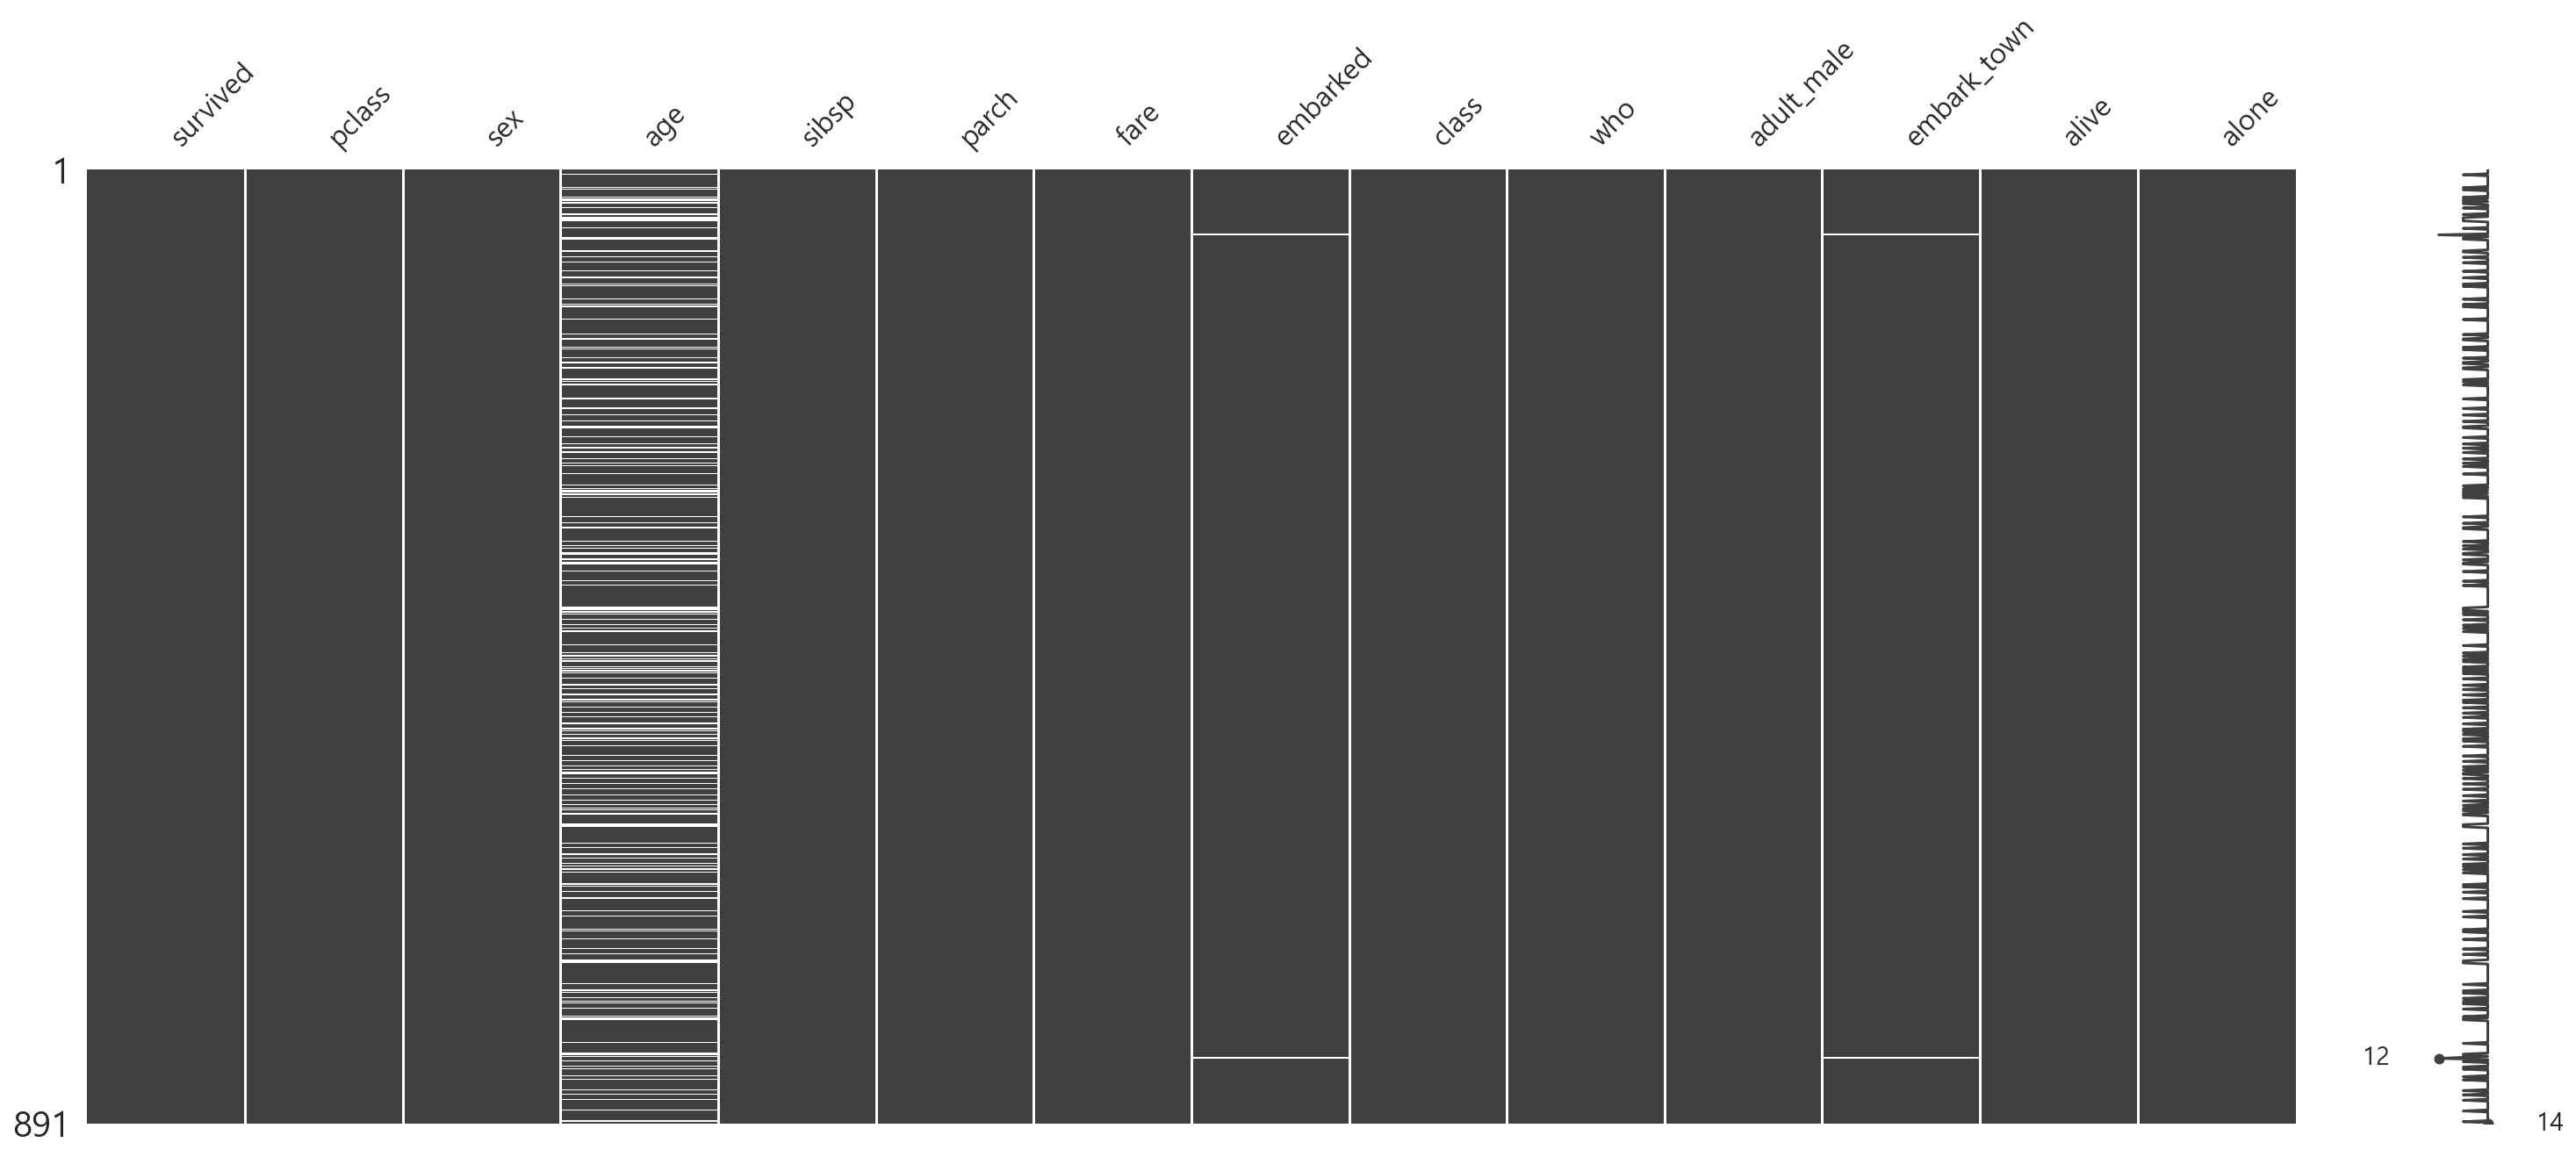

In [84]:
titanic = titanic.dropna(thresh=int(len(titanic) * 0.5), axis=1)

msno.matrix(titanic)
plt.show()

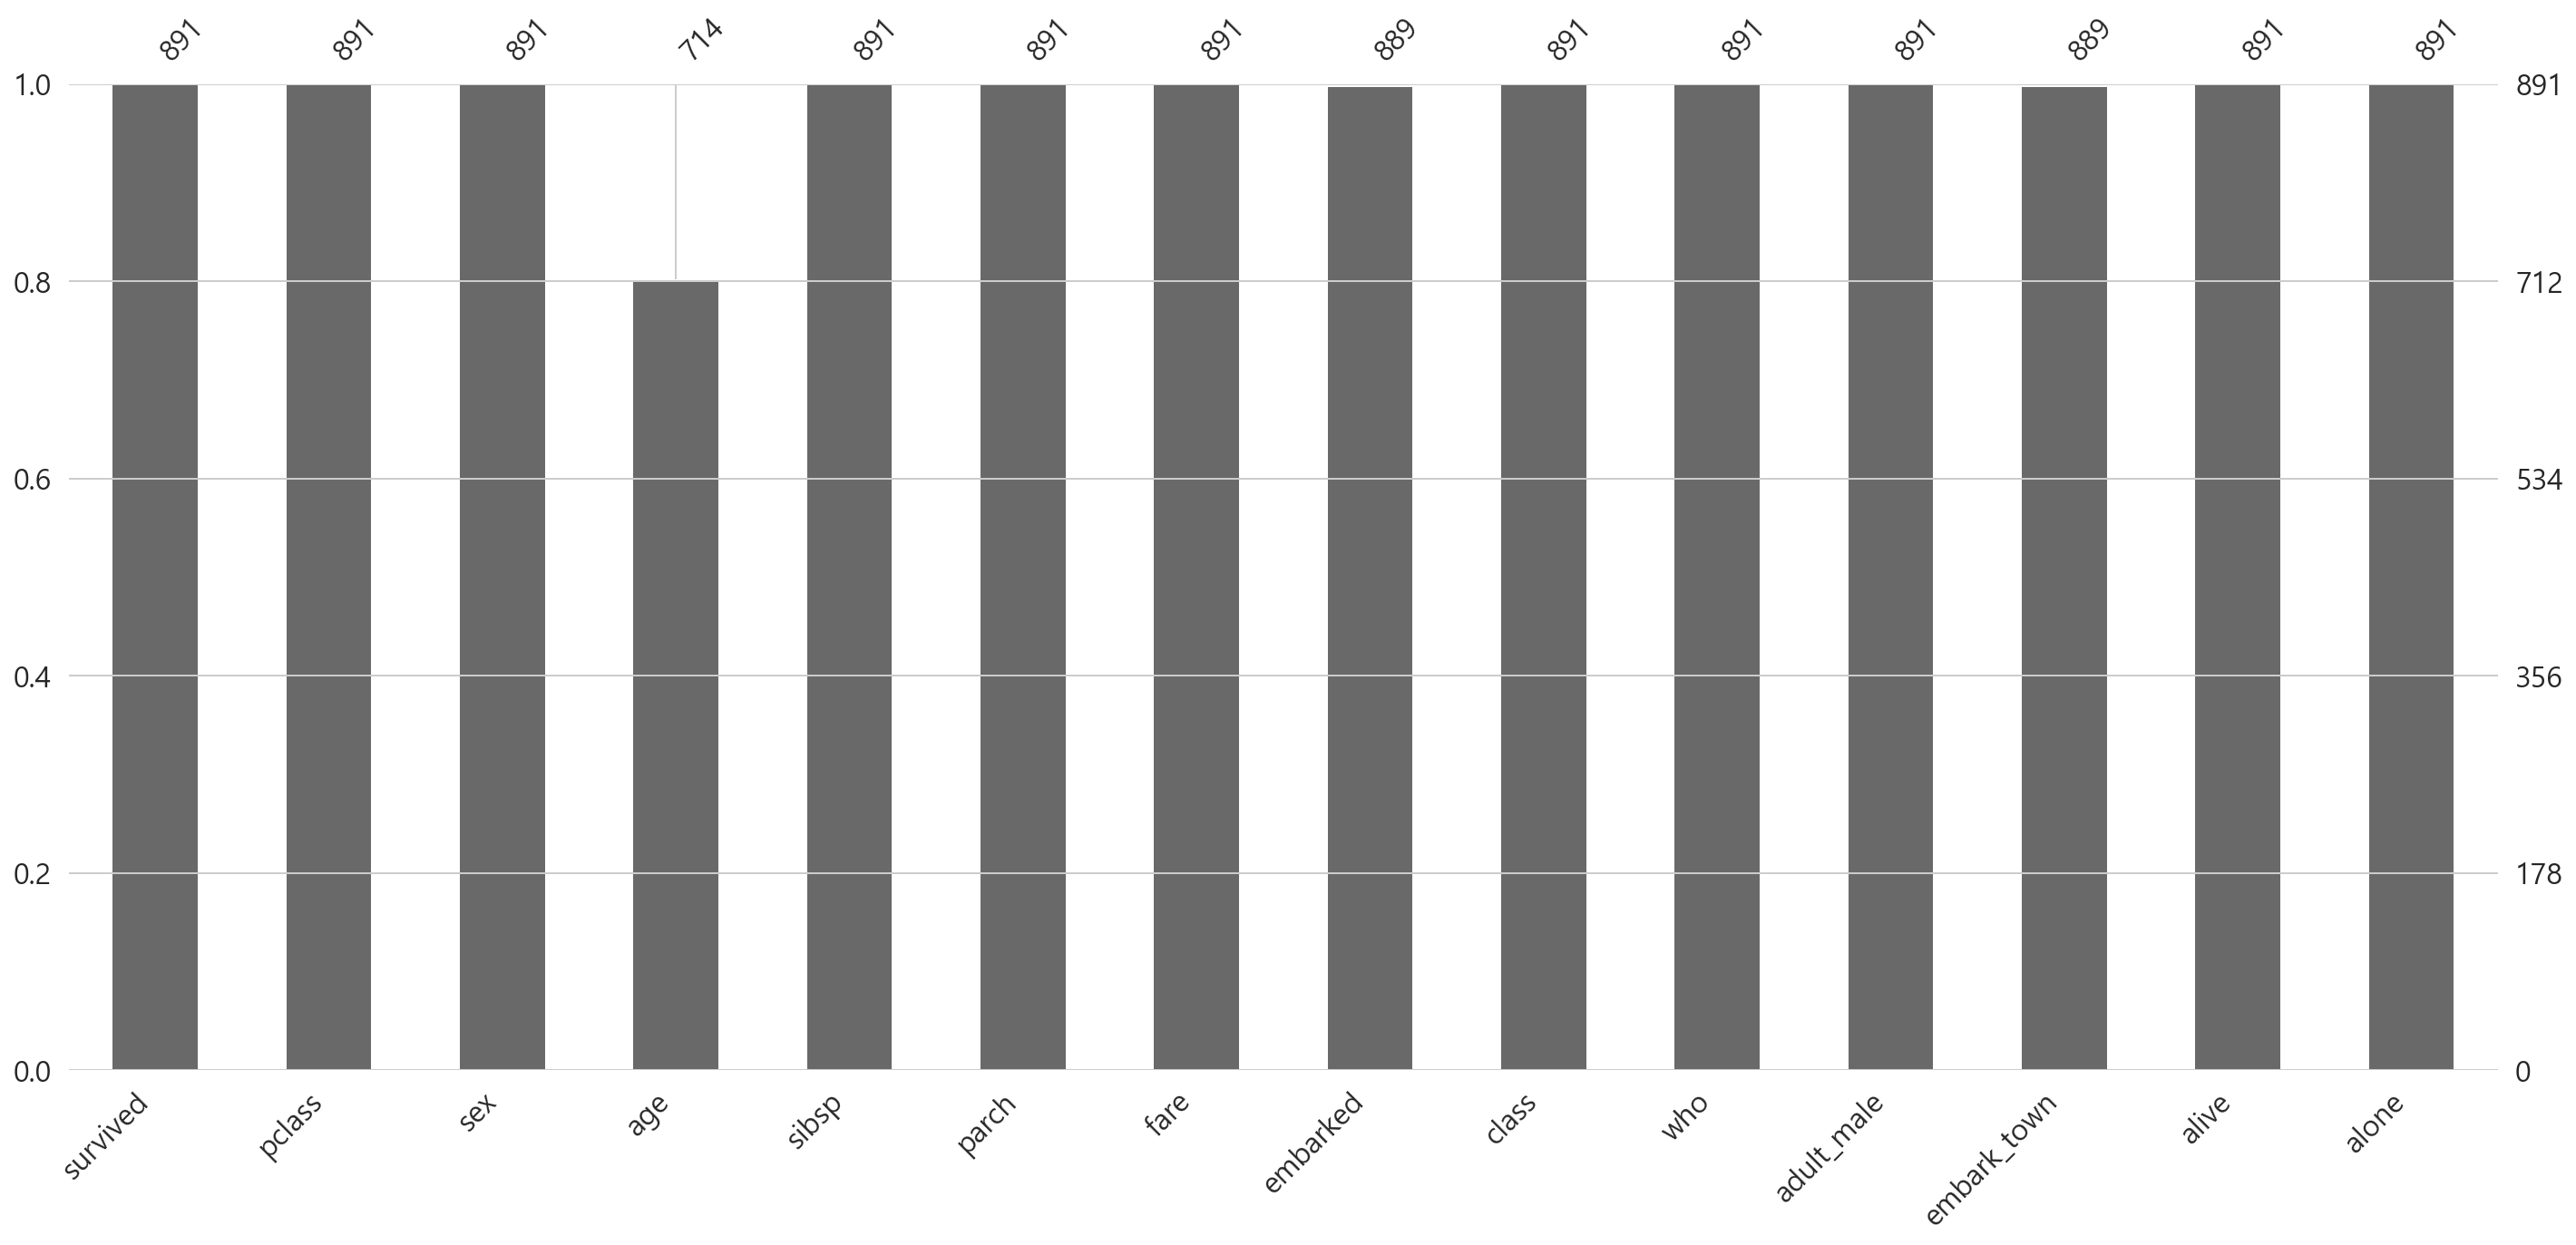

In [85]:
msno.bar(titanic)
plt.show() ; 

### 결측 데이터를 다른 데이터로 대처하는 방법
- 결측 데이터를 해당 열의 비결측 데이터의 **평균값 혹은 중앙값**으로 대체한다.
    - sklearn 패키지의 SimpleImputer 클래스
- 사용방법
    - SimpleImputer 클래스 객체 생성
    - strategy 인수 설정 : 
        - mean 평균값
        - median 중앙값
        - most_fequent 최빈값
    - fit_transform 메서드 : 대체값이 채워진 데이터 프레임 반환
        - 입력은 2차원 배열 형태로 넣어주어야 한다.
        - df[["age"]]
- strategy 인수 설정 방법 
    - **데이터가 실수 연속값인 경우 : mean, median 선택, 값의 분포가 대칭적이면 mean, 심하게 비대칭인 경우 median 적당**
    - **데이터가 범주값이거나 정수값인 경우는 most_frequent 값으로 대체**

### 타이타닉 데이터의 범주값의 결측치 대체
- 범주값이므로 최빈값으로 대체하면 적당하다.

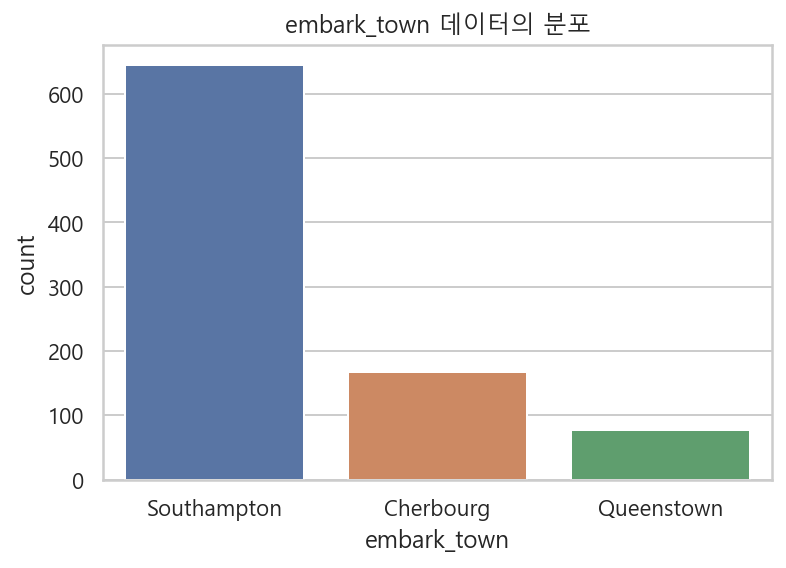

In [86]:
sns.countplot(titanic.embark_town)
plt.title("embark_town 데이터의 분포")
plt.show() ; 

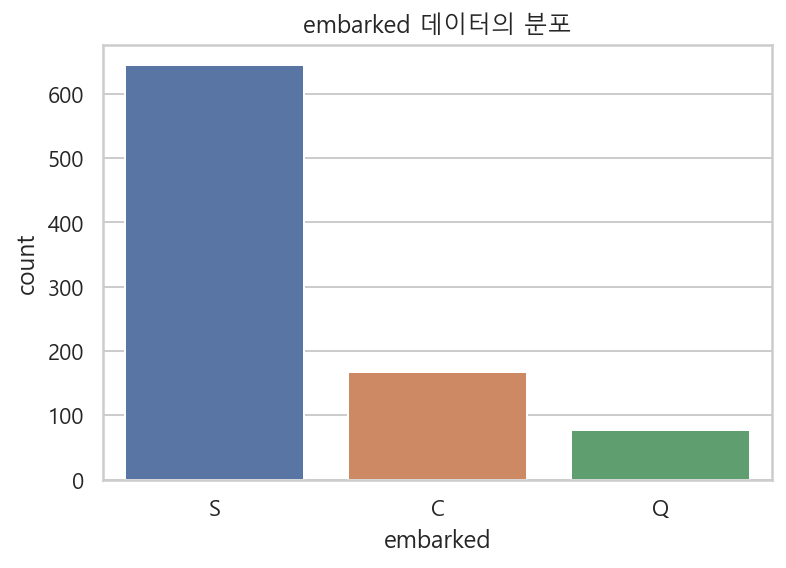

In [87]:
sns.countplot(titanic["embarked"])
plt.title("embarked 데이터의 분포")
plt.show() ; 

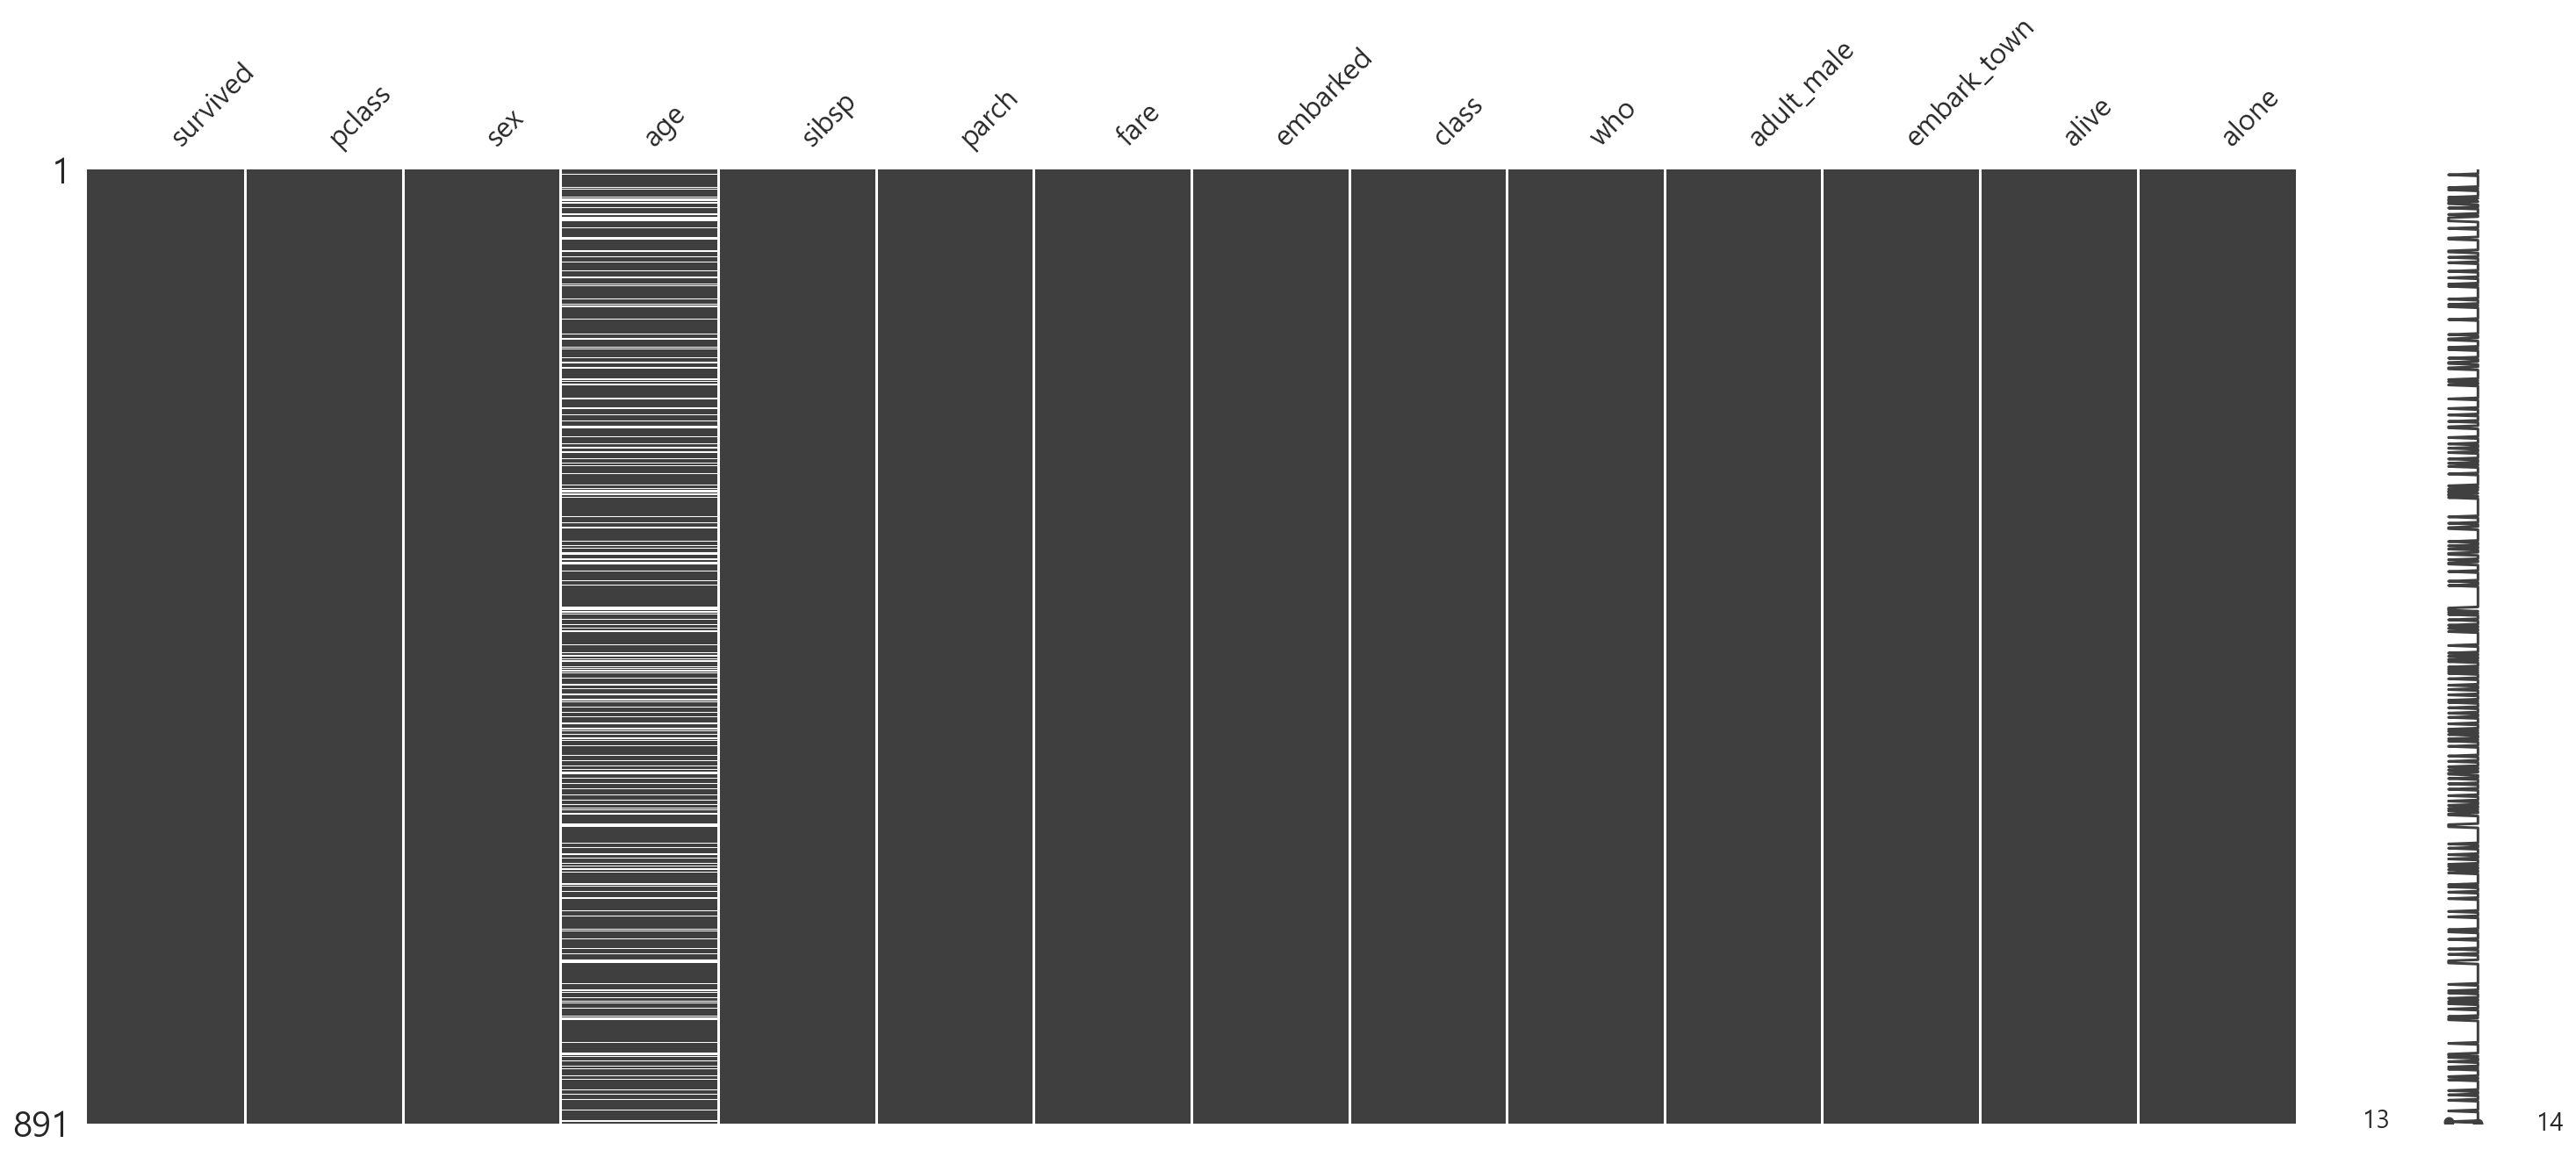

In [88]:
from sklearn.impute import SimpleImputer

imputer_embark_town = SimpleImputer(strategy="most_frequent")
titanic["embark_town"] = imputer_embark_town.fit_transform(titanic[["embark_town"]])
titanic["embarked"] = imputer_embark_town.fit_transform(titanic[["embarked"]])

msno.matrix(titanic)
plt.show() ;

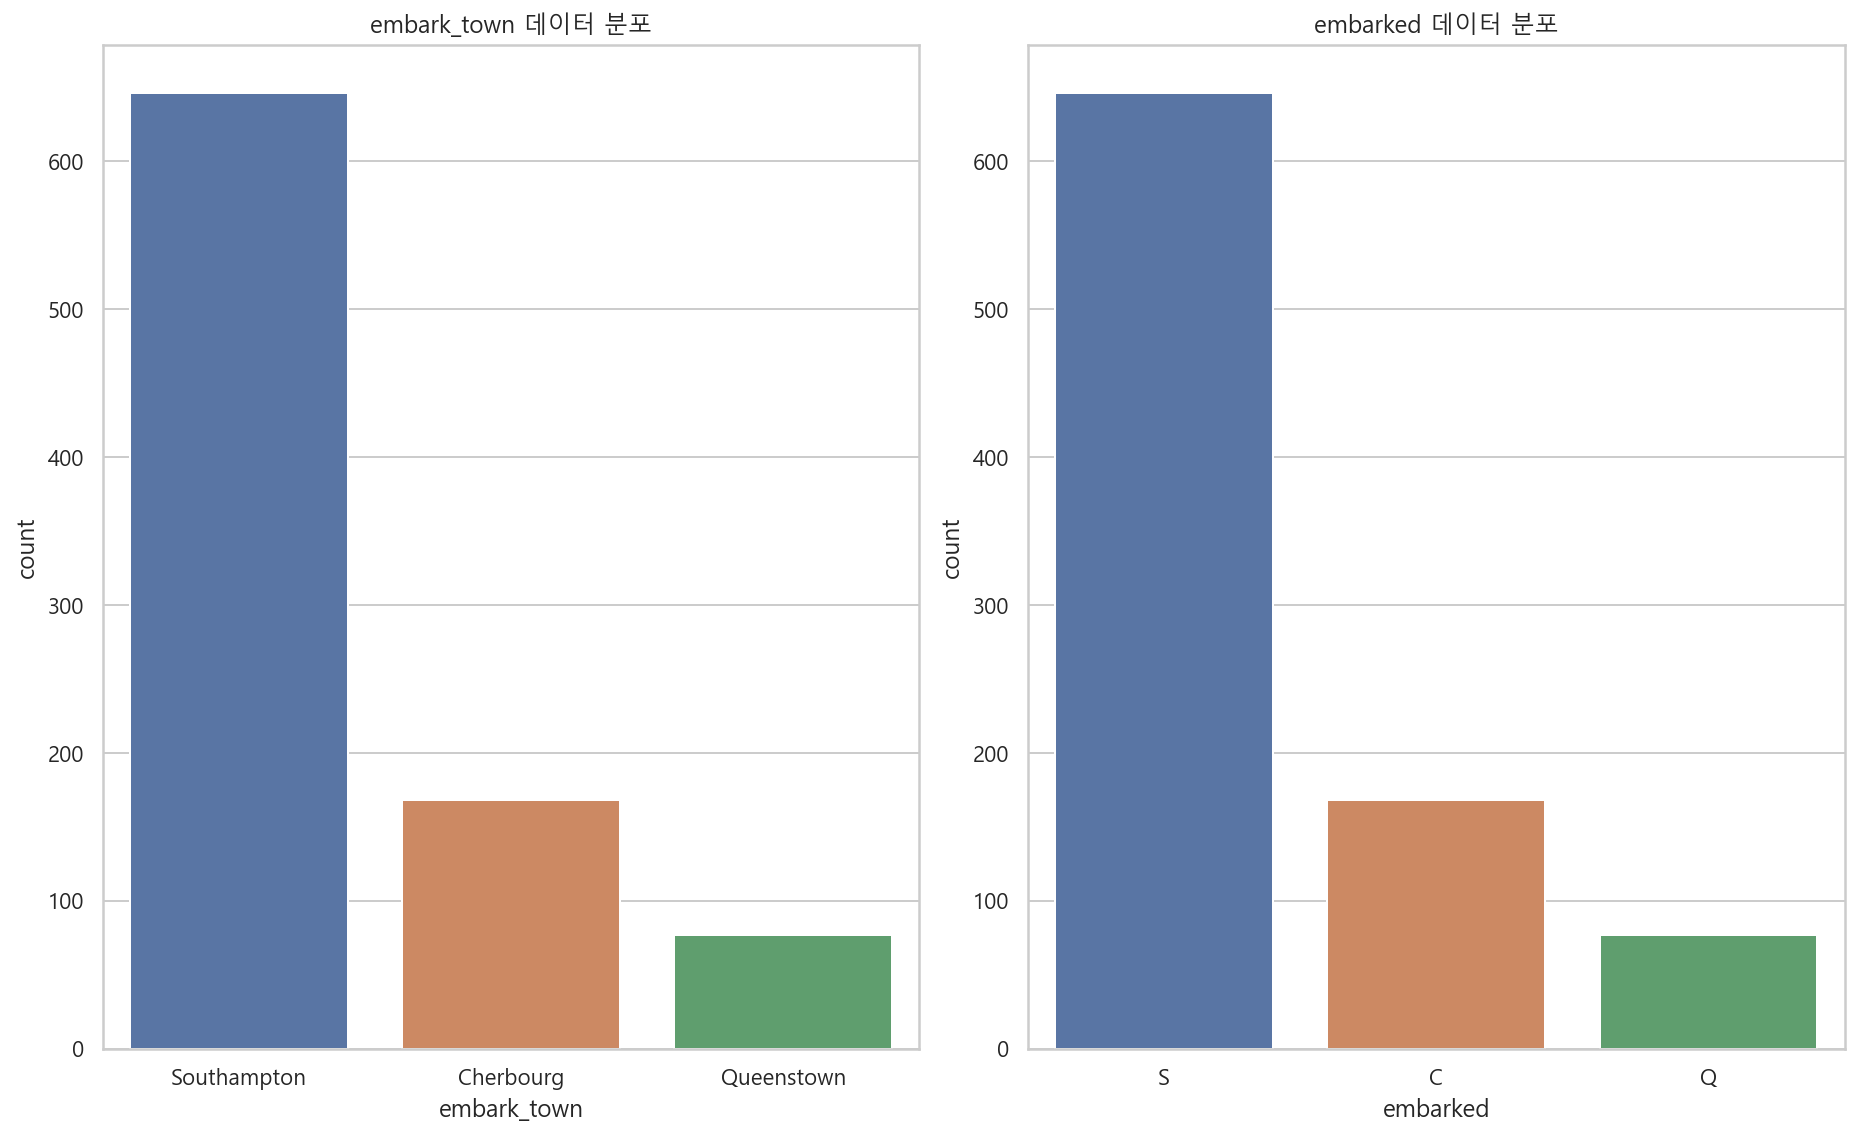

In [90]:
plt.figure(figsize=(13, 8))
plt.subplot(121)
sns.countplot(titanic["embark_town"])
plt.title("embark_town 데이터 분포")

plt.subplot(122)
sns.countplot(titanic["embarked"])
plt.title("embarked 데이터 분포")

plt.tight_layout()
plt.show();

### titanic 데이터의 age 결측 데이터 대체
- age 데이터의 분포 모양 확인
    - 비대칭 : 중앙값
    - 대칭 : 평균값    

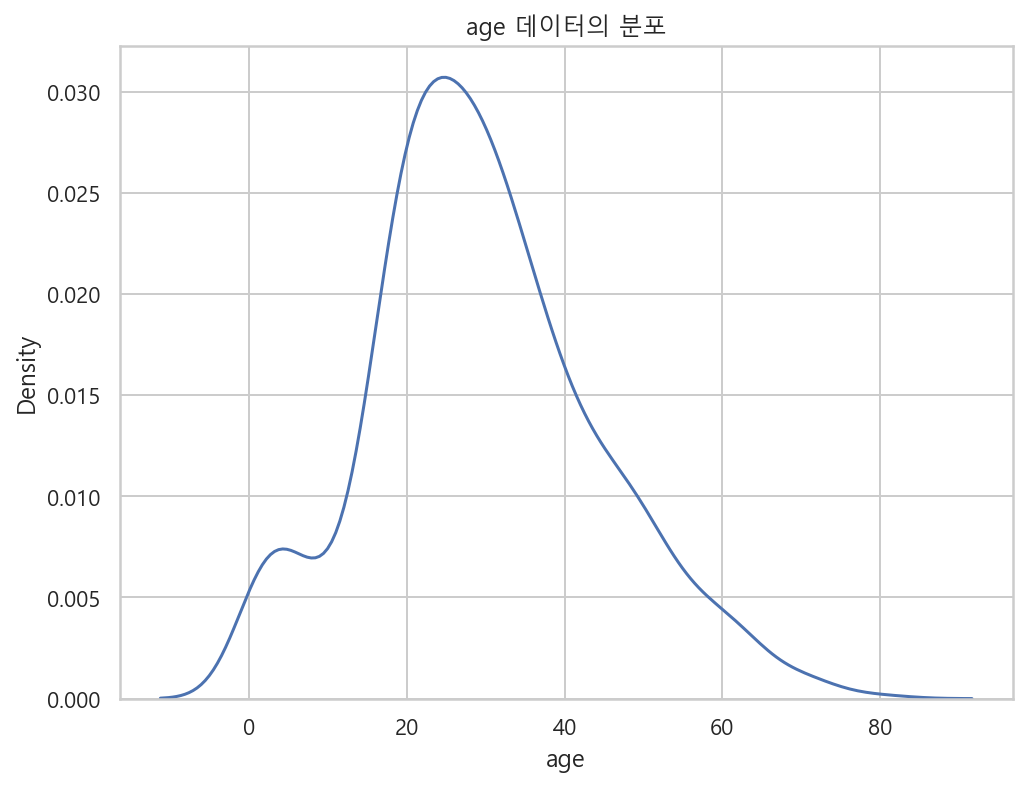

In [91]:
plt.figure(figsize=(8, 6))
sns.kdeplot(titanic.age)
plt.title("age 데이터의 분포")
plt.show()  ;

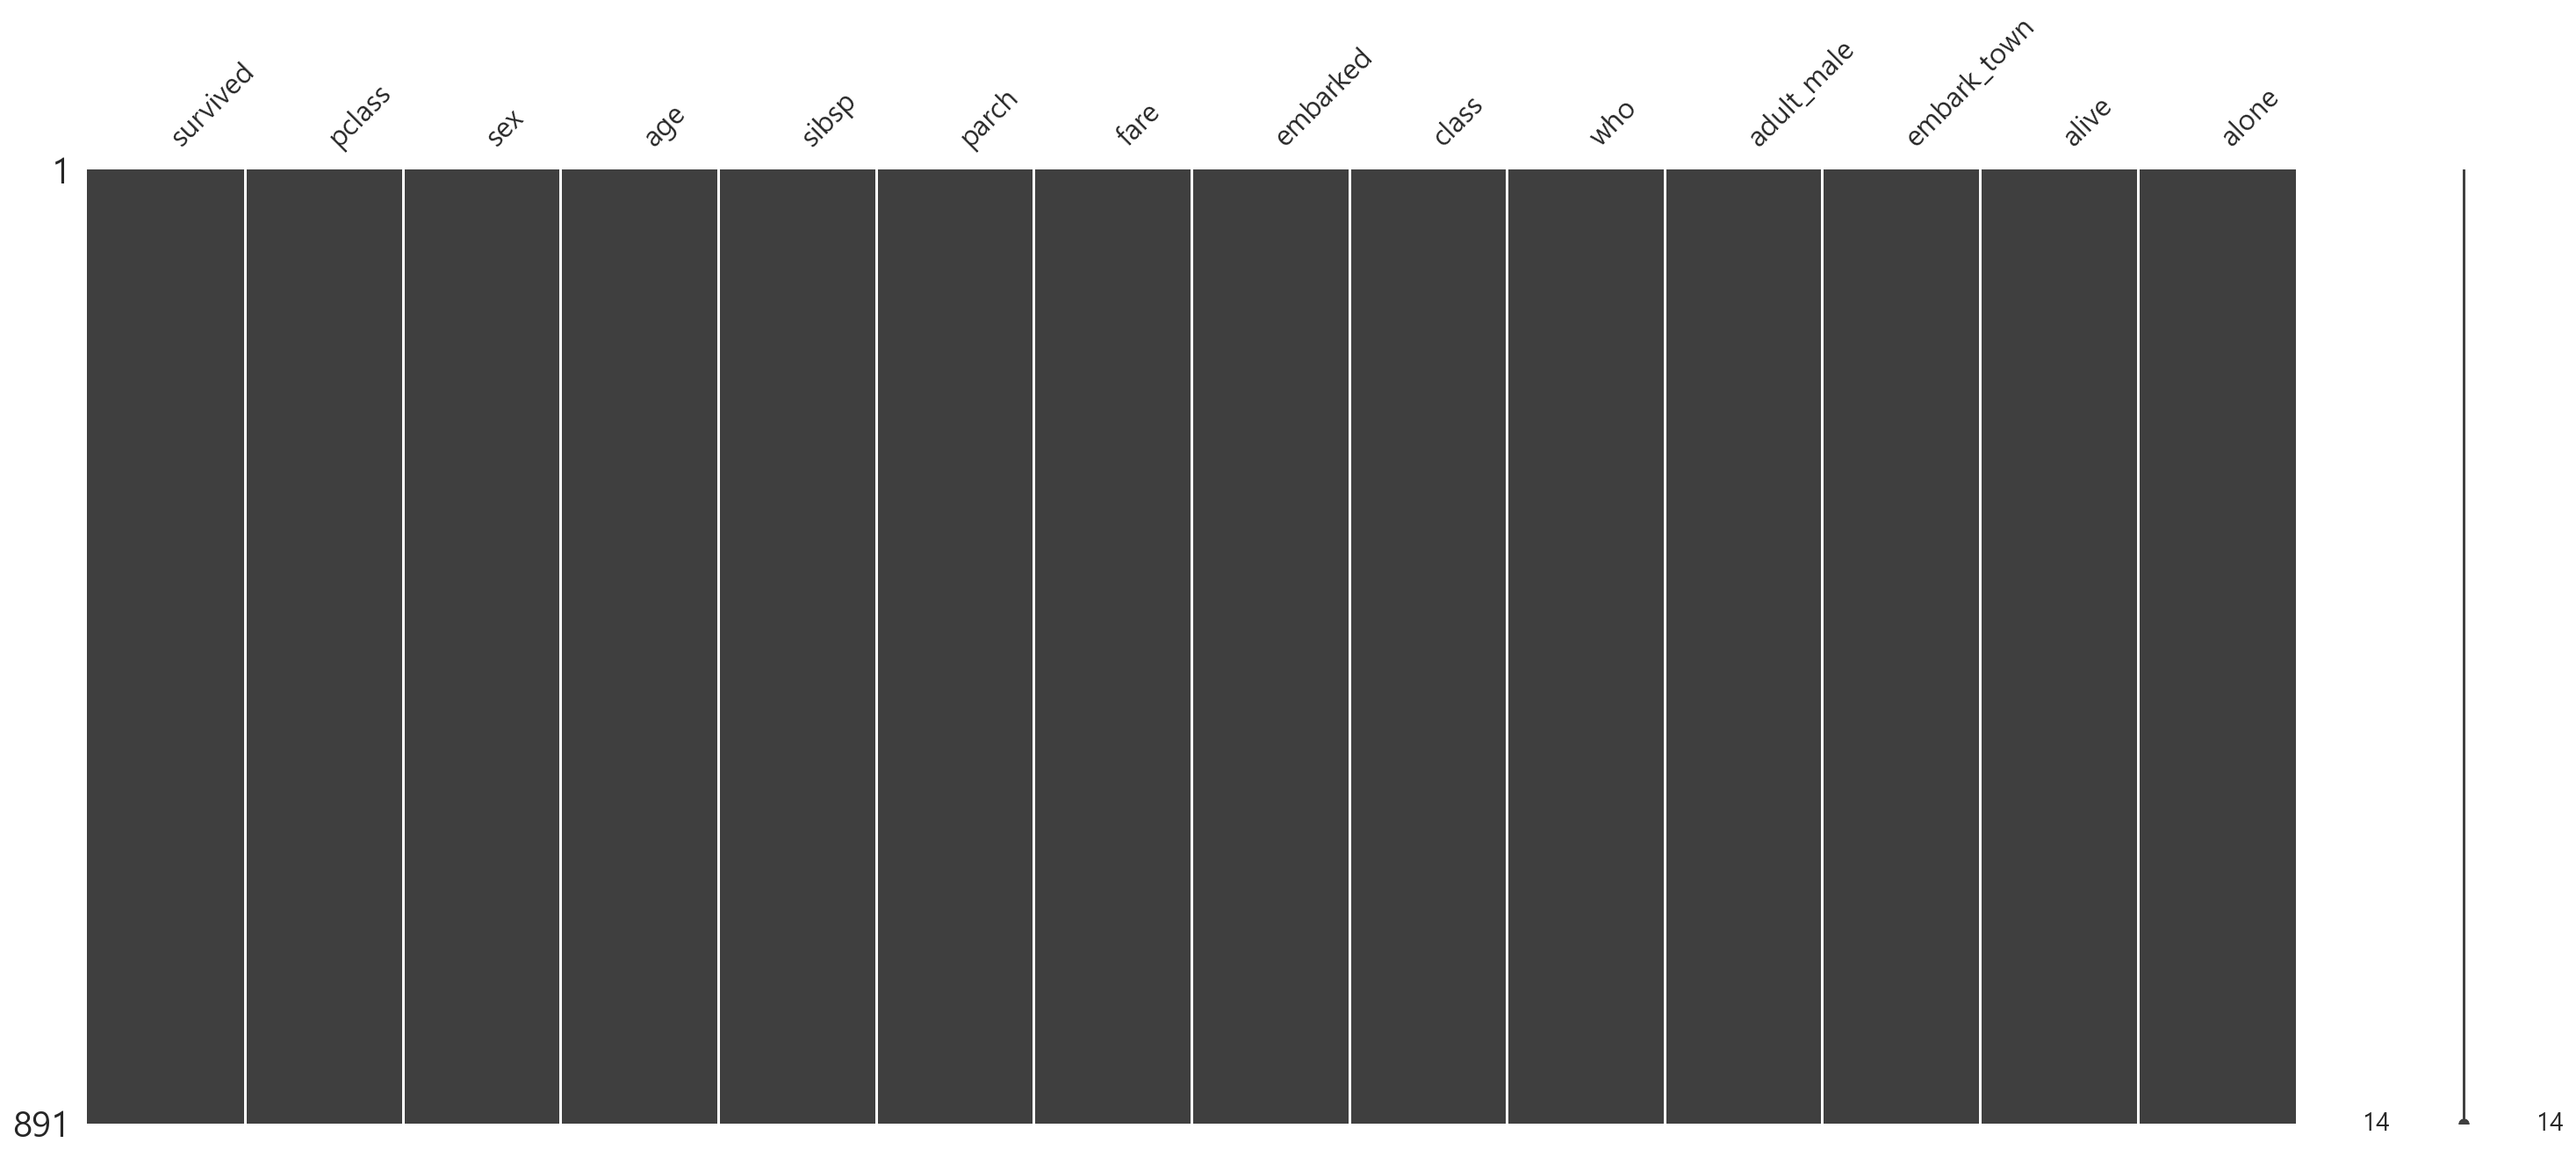

In [92]:
imputer_age = SimpleImputer(strategy="median")
titanic["age"] = imputer_age.fit_transform(titanic[["age"]])

msno.matrix(titanic)
plt.show() ; 

### patsy 패키지
- patsy 패키지를 사용하여 데이터프레임에서 원하는 데이터만 선택하거나 새로운 데이터를 조합 생성할 수 있다.
- 데이터 프레임에서 원하는 데이터를 추출하는 방법
    - dmatrix(formula, data) : formula는 컬럼의 이름, data는 사용할 원본 데이터
    - formula : "컬럼명 + 컬럼명 + 0" : 0을 마지막에 넣어준다.
    - **+ 0의 의미** : 1로 만들어진 상수항 컬럼열을 넣지 말라는 명령어이다. +0을 입력하지 않으면 patsy는 자동으로 가장 앞쪽에 intercept란 이름의 1 컬럼을 생성해준다.
    - -1을 넣어도 +0과 같은 기능이다.
    
#### 수학변환 기능
- 입력변수를 어떤 함수에 넣어서 다른 값으로 계산하여 반환해준다.
    - numpy 함수, 사용자 정의 함수도 사용가능
    
#### 기존의 데이터끼리 계산 기능
- 기존 데이터를 조합하여 새로운 데이터를 만드는 것도 가능하다.
- **상호작용 interaction** : 두 변수를 곱해서 만들어지는 새로운 변수
    - ":" 기호 사용 : x1 + x2 + x1:x2 + 0
    - "*" 기호 사용 : x1 * x2 + 0 : 위와 같은 기능이다.
- **I(x1+x2)** : 상호작용(두 변수의 곱)을 제외한 여러가지 변수에 대한 다른 연산 기능    

In [1]:
from patsy import demo_data

In [2]:
df = pd.DataFrame(demo_data("x1", "x2", "x3", "x4", "x5"))
df

,x1,x2,x3,x4,x5
0,1.764052,-0.977278,0.144044,0.333674,-2.552990
1,0.400157,0.950088,1.454274,1.494079,0.653619
2,0.978738,-0.151357,0.761038,-0.205158,0.864436
3,2.240893,-0.103219,0.121675,0.313068,-0.742165
4,1.867558,0.410599,0.443863,-0.854096,2.269755


In [3]:
from patsy import dmatrix

In [4]:
dmatrix("x1 + 0", data=df)

DesignMatrix with shape (5, 1)
       x1
  1.76405
  0.40016
  0.97874
  2.24089
  1.86756
  Terms:
    'x1' (column 0)

#### 상수항 컬럼 제외
- +0 또는 -1

In [5]:
dmatrix("x1+x2+x3+0", data=df)

DesignMatrix with shape (5, 3)
       x1        x2       x3
  1.76405  -0.97728  0.14404
  0.40016   0.95009  1.45427
  0.97874  -0.15136  0.76104
  2.24089  -0.10322  0.12168
  1.86756   0.41060  0.44386
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x3' (column 2)

In [6]:
dmatrix("x1+x2+x3-1", data=df)

DesignMatrix with shape (5, 3)
       x1        x2       x3
  1.76405  -0.97728  0.14404
  0.40016   0.95009  1.45427
  0.97874  -0.15136  0.76104
  2.24089  -0.10322  0.12168
  1.86756   0.41060  0.44386
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x3' (column 2)

#### 상수항 컬럼 생성
- 컬럼명만 나열

In [7]:
dmatrix("x1+x2+x3", data=df)

DesignMatrix with shape (5, 4)
  Intercept       x1        x2       x3
          1  1.76405  -0.97728  0.14404
          1  0.40016   0.95009  1.45427
          1  0.97874  -0.15136  0.76104
          1  2.24089  -0.10322  0.12168
          1  1.86756   0.41060  0.44386
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)
    'x3' (column 3)

### 수학변환 기능
- 입력변수를 어떤 함수에 넣어서 다른 값으로 계산하여 반환해준다.
    - numpy 함수, 사용자 정의 함수도 사용가능

In [8]:
dmatrix("x1 + np.log(np.abs(x2))", df)

DesignMatrix with shape (5, 3)
  Intercept       x1  np.log(np.abs(x2))
          1  1.76405            -0.02298
          1  0.40016            -0.05120
          1  0.97874            -1.88811
          1  2.24089            -2.27090
          1  1.86756            -0.89014
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'np.log(np.abs(x2))' (column 2)

In [9]:
def ten_times(x) : 
    return 10 * x

In [10]:
dmatrix("ten_times(x2)", df)

DesignMatrix with shape (5, 2)
  Intercept  ten_times(x2)
          1       -9.77278
          1        9.50088
          1       -1.51357
          1       -1.03219
          1        4.10599
  Terms:
    'Intercept' (column 0)
    'ten_times(x2)' (column 1)

### 기존의 데이터끼리 계산 기능
- 기존 데이터를 조합하여 새로운 데이터를 만드는 것도 가능하다.
- **상호작용 interaction** : 두 변수를 곱해서 만들어지는 새로운 변수
    - ":" 기호 사용 : x1 + x2 + x1:x2 + 0
    - "*" 기호 사용 : x1 * x2 + 0 : 위와 같은 기능이다.
- 상호작용(두 변수의 곱)을 제외한 다른 연산을 하려면 **I()** 연산자를 사용한다.    

In [11]:
dmatrix("x1 + x2 + x1:x2 + 0", df)

DesignMatrix with shape (5, 3)
       x1        x2     x1:x2
  1.76405  -0.97728  -1.72397
  0.40016   0.95009   0.38018
  0.97874  -0.15136  -0.14814
  2.24089  -0.10322  -0.23130
  1.86756   0.41060   0.76682
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x1:x2' (column 2)

In [107]:
dmatrix("x1 * x2 + 0", df)

DesignMatrix with shape (5, 3)
       x1        x2     x1:x2
  1.76405  -0.97728  -1.72397
  0.40016   0.95009   0.38018
  0.97874  -0.15136  -0.14814
  2.24089  -0.10322  -0.23130
  1.86756   0.41060   0.76682
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x1:x2' (column 2)

#### 여러변수의 다른 연산
- 상호작용(변수끼리의 곱)을 제외한 다른 연산

In [108]:
dmatrix("x1 + x2 + I(x1 + x2) + 0", df)

DesignMatrix with shape (5, 3)
       x1        x2  I(x1 + x2)
  1.76405  -0.97728     0.78677
  0.40016   0.95009     1.35025
  0.97874  -0.15136     0.82738
  2.24089  -0.10322     2.13767
  1.86756   0.41060     2.27816
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'I(x1 + x2)' (column 2)

In [12]:
dmatrix("x1 + x2 + I(x1-ten_times(x2)) + 0", df)

DesignMatrix with shape (5, 3)
       x1        x2  I(x1 - ten_times(x2))
  1.76405  -0.97728               11.53683
  0.40016   0.95009               -9.10073
  0.97874  -0.15136                2.49231
  2.24089  -0.10322                3.27308
  1.86756   0.41060               -2.23843
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'I(x1 - ten_times(x2))' (column 2)

In [13]:
dmatrix("x4 + x5 + I(x4 - x5)", df)

DesignMatrix with shape (5, 4)
  Intercept        x4        x5  I(x4 - x5)
          1   0.33367  -2.55299     2.88666
          1   1.49408   0.65362     0.84046
          1  -0.20516   0.86444    -1.06959
          1   0.31307  -0.74217     1.05523
          1  -0.85410   2.26975    -3.12385
  Terms:
    'Intercept' (column 0)
    'x4' (column 1)
    'x5' (column 2)
    'I(x4 - x5)' (column 3)

### 스케일링
- 선형회귀분석에서 조건수(condition number)의 영향으로 데이터 분석의 결과가 달라질 수 있다.
- 이러한 경우 데이터의 평균을 0, 표준편차를 1로 만드는 스케일링이 분석의 결과의 품질을 높여 줄 수 있다.
    - 평균 : 0
    - 표준편차 : 1
- patsy 스케일링
    - center() : 평균을 0으로 스케일링, 각 요소에서 평균을 제거
    - standardize() : 평균을 0으로하고 표준편차를 1로 스케일링
    - scale() : standardize()와 기능이 같다.

In [15]:
dm = dmatrix("center(x1) + 0", df)
dm

DesignMatrix with shape (5, 1)
  center(x1)
     0.31377
    -1.05012
    -0.47154
     0.79061
     0.41728
  Terms:
    'center(x1)' (column 0)

#### center()의 값은 평균을 제거한 값과 같다.

In [20]:
dmatrix("I(x1 - np.mean(x1)) + 0", df)

DesignMatrix with shape (5, 1)
  I(x1 - np.mean(x1))
              0.31377
             -1.05012
             -0.47154
              0.79061
              0.41728
  Terms:
    'I(x1 - np.mean(x1))' (column 0)

In [23]:
(df.x1 - np.mean(df.x1)).mean()

-8.881784197001253e-17

#### 평균값 저장 경로
- 모형의 학습성능을 높이기 위해서 입력 데이터를 스케일링 했다면, 새로운 검증데이터를 입력할때에도 같은 스케일링을 해주어야 한다. 
- 이럴 때 이 경로에 저장된 스케일링값을 재 사용할 수 있다.

In [24]:
dm.design_info.factor_infos

{EvalFactor('center(x1)'): FactorInfo(factor=EvalFactor('center(x1)'),
            type='numerical',
            state=<factor state>,
            num_columns=1)}

## sklearn.preprocessing
- sklearn 패키지의 perprocessing 서브패키지에도 스케일링을 위한 클래스가 있다.
    - 스케일링 및 변수변환 : StandardScaler()
- 스케일링 과정
    - 학습 데이터로 fit() 메서드 실행 : 평균값, 표준편차를 계산한 후 객체내에 저장한다.
    - 학습 데이터로 transform() 메서드 실행 : 저장했던 평균값을 빼서 새로운 평균값이 0이 되도록 계산해준다. 또한 저장했던 표준편차로 나누어 새로운 표준편차가 1이 되도록 계산해준다. 
    - fit()과 transform()을 합쳐서 fit_transform() 메서드를 사용할 수도 있다.
    - 검증용 데이터를 입력하여 transform() 메서드를 실행하면 학습용 데이터의 평균값, 표준편차로 검증용 데이터를 스케일링 해준다.
- 데이터에 아웃라이어가 있는 경우
    - 데이터에 아웃라이어가 있으면 스케일링 값이 0이 아닌 다른 값으로 수렴하는 문제가 발생한다.
    - RobustScaler()를 사용하면 이러한 문제를 해결 할 수 있다.

In [25]:
X = np.arange(7).reshape(-1, 1)
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [26]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
sc = scaler.fit_transform(X)
sc

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5]])

In [30]:
sc.mean()

0.0

#### 데이터에 바이어스가 있으면 스케일링 값이 0이 아닌 곳으로 수렴한다.
- 평균 = 0
- 표준편차 = 1 

In [32]:
X2 = np.vstack([X, [[1000]]])
X2

array([[   0],
       [   1],
       [   2],
       [   3],
       [   4],
       [   5],
       [   6],
       [1000]])

In [33]:
X2.mean()

127.625

In [34]:
scaler.fit_transform(X2)

array([[-0.38705669],
       [-0.38402392],
       [-0.38099115],
       [-0.37795839],
       [-0.37492562],
       [-0.37189286],
       [-0.36886009],
       [ 2.64570872]])

#### RobusterScaler
- 중앙값 : 0 
- IQR : 1
- 이 되도록 변환해준다. 아웃라이어가 섞여 있어도 대부분의 데이터는 0 주위의 값으로 변환된다.

In [37]:
from sklearn.preprocessing import RobustScaler

In [38]:
scaler = RobustScaler()
scaler.fit_transform(X2)

array([[-1.00000000e+00],
       [-7.14285714e-01],
       [-4.28571429e-01],
       [-1.42857143e-01],
       [ 1.42857143e-01],
       [ 4.28571429e-01],
       [ 7.14285714e-01],
       [ 2.84714286e+02]])

### PolynomialFeatrues 클래스
- PolynomialFeatures 클래스 : 입력 데이터를 여러개의 다항식으로 변환해준다.
    - x -> [1, x^2, x^3, x^4, ...]
    - 컬럼별로 입력변수의 데이터의 거듭제곱값으로 채워준다.
- 입력인수
    - dgree : 차수
    - include_bias : 상수항 생성 여부

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [41]:
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  6., 36.]])

In [45]:
PolynomialFeatures(degree=3, include_bias=False).fit_transform(X)

array([[  0.,   0.,   0.],
       [  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.],
       [  6.,  36., 216.]])

### FunctionTransformer 클래스
- FunctionTransformer 클래스 : 사용자 지정 함수를 사용하여 입력값 x를 변환한다.
    - x -> [f_1(x), f_2(x), ...]
- 데이터 변환
    - 비선형 회귀분석에서 원하는 목표값을 더 잘 예측하기 위해서 새로운 데이터를 만들때 사용된다.
    - 360도 자체는 예측문제의 입력값으로 사용할 수 없다. 
    - 이러한 경우 삼각함수값의 숫자쌍으로 바꾸면 같은 각도를 같은 숫자쌍으로 표현 할 수 있다. 
    - 0도, 360도, 720도는 사실 같은 각도인데 숫자가 달라지는 것이므로 이 각도들을 같은 값으로 만들어 준다.

In [47]:
x = 90 * np.arange(9).reshape(-1, 1)
x

array([[  0],
       [ 90],
       [180],
       [270],
       [360],
       [450],
       [540],
       [630],
       [720]])

In [48]:
from sklearn.preprocessing import FunctionTransformer

In [52]:
def degree2sincos(X) : 
    x0 = np.sin(X * np.pi / 180)
    x1 = np.cos(X * np.pi / 180)
    X_new = np.hstack([x0, x1])
    return X_new

In [53]:
%matplotlib inline

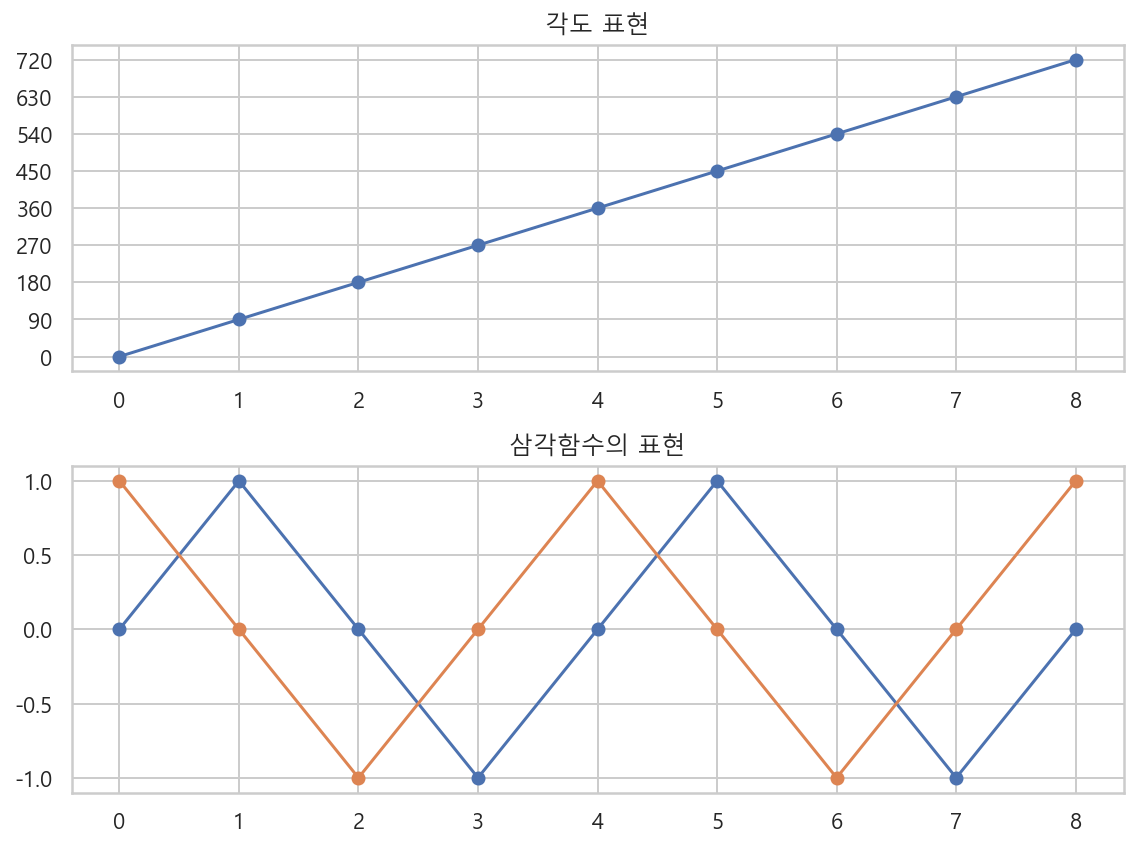

In [56]:
x2 = FunctionTransformer(degree2sincos).fit_transform(x)

plt.figure(figsize=(8, 6))
plt.subplot(211)
plt.plot(x, marker="o")
plt.yticks(x.flatten())
plt.title("각도 표현")

plt.subplot(212)
plt.plot(x2, marker="o")
plt.title("삼각함수의 표현")

plt.tight_layout()
plt.show() ; 

In [62]:
x0 = np.sin(x * np.pi / 180)
x0

array([[ 0.0000000e+00],
       [ 1.0000000e+00],
       [ 1.2246468e-16],
       [-1.0000000e+00],
       [-2.4492936e-16],
       [ 1.0000000e+00],
       [ 3.6739404e-16],
       [-1.0000000e+00],
       [-4.8985872e-16]])

In [64]:
x1 = np.cos(x * np.pi / 180)
x1

array([[ 1.0000000e+00],
       [ 6.1232340e-17],
       [-1.0000000e+00],
       [-1.8369702e-16],
       [ 1.0000000e+00],
       [ 3.0616170e-16],
       [-1.0000000e+00],
       [-4.2862638e-16],
       [ 1.0000000e+00]])

In [66]:
x_new = np.hstack([x0, x1])
x_new

array([[ 0.0000000e+00,  1.0000000e+00],
       [ 1.0000000e+00,  6.1232340e-17],
       [ 1.2246468e-16, -1.0000000e+00],
       [-1.0000000e+00, -1.8369702e-16],
       [-2.4492936e-16,  1.0000000e+00],
       [ 1.0000000e+00,  3.0616170e-16],
       [ 3.6739404e-16, -1.0000000e+00],
       [-1.0000000e+00, -4.2862638e-16],
       [-4.8985872e-16,  1.0000000e+00]])

In [67]:
FunctionTransformer().fit_transform(x_new)

array([[ 0.0000000e+00,  1.0000000e+00],
       [ 1.0000000e+00,  6.1232340e-17],
       [ 1.2246468e-16, -1.0000000e+00],
       [-1.0000000e+00, -1.8369702e-16],
       [-2.4492936e-16,  1.0000000e+00],
       [ 1.0000000e+00,  3.0616170e-16],
       [ 3.6739404e-16, -1.0000000e+00],
       [-1.0000000e+00, -4.2862638e-16],
       [-4.8985872e-16,  1.0000000e+00]])